# Eurofer Properties Database



## Table of Contents
- [Abstract](#abstract)
- [Introduction](#introduction)
- [Section 1: Manufacturing & Heat Treatment](#section-1)
  - [1.1. Composition](#composition)
  - [1.2. Heat Treatment](#heat_treatment)
  - [1.3. Microstructure](#microstructure)
  - [1.4. Product Forms](#forms)
- [Section 2: Thermo-physical Properties](#section-2)
  - [2.1. Density](#density)
  - [2.2. Thermal Diffusivity](#diffusivity)
  - [2.3. Specific Heat](#cp)
  - [2.4. Thermal Conductivity](#conductivity)
  - [2.5. Coefficient of Thermal Expansion](#expansion)
  - [2.6. Thermal Emissivity](#emissivity)
  - [2.7. Electrical Resistivity](#resistivity)
  - [2.8. Magnetic Properties](#magnetic)
  - [2.9. Elastic Properties](#elastic)
- [Section 3: Mechanical Properties](#mechanical)

<a id="abstract"></a>
<h2 style="text-align: center;">Abstract</h2>
<p style="text-align: justify;">
We present a comprehensive database for the ferritic-martensitic steel Eurofer97.  The database is intended to assist in the mechanical design of components manufactured from reduced activation 9 Cr steels (e.g. Eurofer97), in particular, in a fusion reactor power source.  The database is classified into three main categories: (1) fabrication and microstructure, (2) thermophysical properties, and (3) mechanical properties.  The effects of irradiation (both neutron and ion) on the properties of Eurofer are also discussed. Data for each property is collected from various sources available in the public domain.  The sources of data are given together with links to the original publication for verification or corrections. Various functional forms are developed to describe the properties of Eurofer97 as a function of temperature, and if available, as a function of the irradiation dose.
</p>

<a id="introduction"></a>
<h2>Introduction</h2>

<a id="section-1"></a>
<h2>Section 1: Manufacturing & Heat Treatment</h2>
<a id="composition"></a>
<h3> 1.1. Composition</h3>

<table border="1">
    <tr>
        <th>Specification</th>
        <th>Producer analysis, heat 83699/83698 (Ø100 mm/14 mm)</th>
        <th>IMF analysis, heat 83698, 1.5 mm plate</th>
        <th>CEA analysis, 3 heats, 5 sizes</th>
    </tr>
    <tr>
        <td>Cr</td>
        <td>8.50-9.50</td>
        <td>8.87/8.82</td>
        <td>9.21</td>
        <td>8.68-9.04</td>
    </tr>
    <tr>
        <td>C</td>
        <td>0.09-0.12</td>
        <td>0.12/0.11</td>
        <td>0.104</td>
        <td>0.092-0.117</td>
    </tr>
    <tr>
        <td>Mn</td>
        <td>0.20-0.60</td>
        <td>0.42/0.47</td>
        <td>0.502</td>
        <td>0.41-0.50</td>
    </tr>
    <tr>
        <td>V</td>
        <td>0.15-0.25</td>
        <td>0.19/0.20</td>
        <td>0.204</td>
        <td>0.17-0.19</td>
    </tr>
    <tr>
        <td>W</td>
        <td>1.0-1.2</td>
        <td>1.10/1.09</td>
        <td>1.148</td>
        <td>1.03-1.26</td>
    </tr>
    <tr>
        <td>Ta</td>
        <td>0.05-0.09</td>
        <td>0.14/0.13</td>
        <td>0.14</td>
        <td>0.10-0.15</td>
    </tr>
    <tr>
        <td>N2</td>
        <td>0.015-0.045</td>
        <td>0.018/0.020</td>
        <td>0.0234</td>
        <td>0.018-0.0226</td>
    </tr>
    <tr>
        <td>O2</td>
        <td>max. 0.01</td>
        <td>0.0013/0.0010</td>
        <td><0.001</td>
        <td>0.0005-0.0011</td>
    </tr>
    <tr>
        <td>P</td>
        <td>max. 0.005</td>
        <td>0.004/0.005</td>
        <td><0.04</td>
        <td>0.011-0.013</td>
    </tr>
    <tr>
        <td>S</td>
        <td>max. 0.005</td>
        <td>0.003/0.004</td>
        <td>0.004</td>
        <td><0.003</td>
    </tr>
    <tr>
        <td>B</td>
        <td>max. 0.001*)</td>
        <td><0.0005/0.001</td>
        <td><0.01</td>
        <td><0.001</td>
    </tr>
    <tr>
        <td>Ti</td>
        <td>max. 0.01</td>
        <td>0.008/0.005</td>
        <td>0.004</td>
        <td>0.001-0.005</td>
    </tr>
    <tr>
        <td>Nb</td>
        <td>max. 0.001*)</td>
        <td><0.0010/0.0016</td>
        <td>12 ppm</td>
        <td><20 ppm</td>
    </tr>
    <tr>
        <td>Mo</td>
        <td>max. 0.005*)</td>
        <td><0.0010/0.0010</td>
        <td><8</td>
        <td><20-100</td>
    </tr>
    <tr>
        <td>Ni</td>
        <td>max. 0.005*)</td>
        <td><0.007/0.0200</td>
        <td>214</td>
        <td>400-600</td>
    </tr>
    <tr>
        <td>Cu</td>
        <td>max. 0.005*)</td>
        <td>0.022/0.0016</td>
        <td>35</td>
        <td>30-400</td>
    </tr>
    <tr>
        <td>Al</td>
        <td>max. 0.01*)</td>
        <td>0.008/0.009</td>
        <td>51</td>
        <td>30-40</td>
    </tr>
    <tr>
        <td>Si</td>
        <td>max. 0.05*)</td>
        <td>0.07/0.04</td>
        <td>430</td>
        <td>300-600</td>
    </tr>
    <tr>
        <td>Co</td>
        <td>max. 0.005*)</td>
        <td>0.004/0.006</td>
        <td>67</td>
        <td>80-200</td>
    </tr>
    <tr>
        <td>As+Sn+Sb+Zr</td>
        <td>max. 0.05</td>
        <td><0.015/0.015</td>
        <td> </td>
        <td><65-145</td>
    </tr>
</table>


<a id="heat_treatment"></a>
<h3> 1.2. Heat Treatment</h3>
For a heat treatment sequence involving initial austenitization followed by a lower temperature tempering, example stages and their effects on the microstructure of ferritic/martensitic steel are as follows:

1. **Austenitizing: 979°C for 2 hours, followed by air cooling**
   - **Purpose**: This stage is aimed at fully austenitizing the steel, converting the initial microstructure (whether ferrite, pearlite, or a mix) to austenite. This high temperature ensures the dissolution of carbides and homogenizes the alloy elements within the steel matrix.

2. **Tempering: 739°C for 4 hours, followed by air cooling**
   - **Purpose**: The second stage is significantly lower than the first and serves to temper the martensitic structure formed after the first air cooling. Tempering at this temperature typically leads to a substantial transformation within the microstructure, focusing more on enhancing toughness and ductility while reducing hardness to a controlled extent compared to higher tempering temperatures.


#### Expected Microstructure

- **Tempered Martensite**: The quick cooling after the initial austenitization forms martensite, which is hard and brittle. The subsequent tempering at 739°C is essential for modifying this martensite. At this temperature, the martensitic structure undergoes significant changes:
  - **Carbide Precipitation**: Finer and more evenly distributed carbides form during this tempering stage. These carbides are crucial for increasing the toughness and wear resistance of the steel.
  - **Relaxation of Martensite**: The brittle martensitic lattice relaxes slightly, reducing internal stresses and thus decreasing the brittleness.
  
- **Potential Bainitic Transformation**: Depending on the specific alloying elements and their concentrations, tempering at this lower temperature (739°C) might also facilitate the formation of lower bainite. Bainite is a plate-like microstructure that offers a beneficial combination of strength and ductility. Its formation would depend significantly on the alloy composition and the actual cooling rate post-tempering.

- **Retained Austenite Stability**: At this lower tempering temperature, any retained austenite from the first cooling is more likely to remain stable or transform into bainite rather than converting into martensite, which can add to the ductility and toughness of the final product.

The image below depicts the expected microstructure of tempered martensitic steel. It shows finely dispersed carbides within a martensitic matrix, typical for steel that has been tempered at lower temperatures.


<figure>
   <img src="Figures/Tempered_martensite.webp" alt="Steel microstructure", width="80%">
    <figcaption>Fig.1 - Microstructure of tempered martensitic steel. It shows finely dispersed carbides within a martensitic matrix, typical for steel that has been tempered at lower temperatures.</figcaption>
</figure>

3. **Aging: 600°C for 5000 hours**
**Long-term aging** at 600°C for 5000 hours is a specific type of annealing used primarily to understand and enhance the stability of ferritic/martensitic steels under prolonged thermal exposure. This process is particularly relevant in power generation and aerospace applications where components may experience elevated temperatures for extended periods.

##### Goals of the Annealing Process
1. **Stabilize the Microstructure**: Continuous exposure at 600°C aims to stabilize the microstructure against changes during future operational use.
2. **Optimize Mechanical Properties**: The process intends to balance ductility, toughness, and strength, making the steel suitable for long-term applications at high temperatures.

#### Expected Microstructural Changes
1. **Precipitation and Growth of Carbides**: At 600°C, you can expect the precipitation of various carbides, such as M<sub>23</sub>C<sub>6</sub> (where M can be Cr, Fe), and their growth or coalescence over the extended period. This affects the steel's hardness and tensile strength.
2. **Formation of Laves Phase**: In some ferritic/martensitic steels, especially those with high alloy content, a Fe<sub>2</sub>Mo-type Laves phase can form, which could influence creep resistance negatively by depleting the matrix of beneficial alloying elements like W and Mo.
3. **Spheroidization of Existing Carbides**: If the material has undergone previous treatments that formed pearlite or other lamellar structures, spheroidization might occur, leading to a more ductile microstructure.

#### Impact on Properties
- **Decrease in Hardness and Strength**: Due to the growth and coalescence of carbides, the material might lose some hardness and tensile strength.
- **Increase in Toughness and Ductility**: The spheroidization and stabilization processes tend to increase material ductility and fracture toughness, which are critical for components that undergo thermal cycling.
- **Potential Decrease in Creep Resistance**: The formation of Laves phases and the growth of large carbides can reduce the creep resistance, an essential factor for high-temperature applications.


<a id="microstructure"></a>
<h3> 1.3. Microstructure</h3>

<figure>
    <img src="Figures/Eurofer_Grain_Structure.jpg" alt="Orientation image maps from EBSD data" style="width:80%;">
    <figcaption>Fig.2 - Orientation image maps from EBSD data of ODS-Eurofer steel austenitized at different temperatures (60×40 μm², step size 40 nm).</figcaption>
</figure>

 <figure>
    <img src="Figures/Eurofer_Grain_Size.jpg" alt="Grain Size" style="width:80%;">
    <figcaption>Fig.3 - Mean grain size dependence on austenitizing temperature.</figcaption>
</figure>

Source of Figures: 

<a id="product"></a>
<h3> 1.4. Product Forms</h3>

In [84]:
%load_ext autoreload
%autoreload 2

from Utilities_modelingV2 import *
from Utilities_plotsV2 import *

excel_filename = 'Eurofer_data.xlsx'
material_name = "Eurofer"

fsize = 10
msize = 10

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a id="section-2"></a>
<h2>Section 2: Thermophysical Properties</h2>

<a id="density"></a>
<h3>2.1. Density</h3>

In [85]:
# Load excel data for desired property name
material_property = "Eurofer_density"
var_names, variables = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=7, room_temp=293)

,EUROFER97TempK,EUROFER97DensityKg_m_3
0,293,7750
1,373,7728
2,473,7699
3,573,7666
4,673,7633
5,773,7596
6,873,7558


**Fitting parameters for Eurofer Eurofer_density** 


[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 7
    # variables        = 2
    chi-square         = 91.1115843
    reduced chi-square = 18.2223169
    Akaike info crit   = 21.9632237
    Bayesian info crit = 21.8550440
    R-squared          = 0.99691102
[[Variables]]
    a: -0.33102641 +/- 0.00824056 (2.49%) (init = 1)
    b:  7852.05249 +/- 5.01217273 (0.06%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9468


**The equation for Eurofer Eurofer_density is:**


7852.05 - 0.331026*T

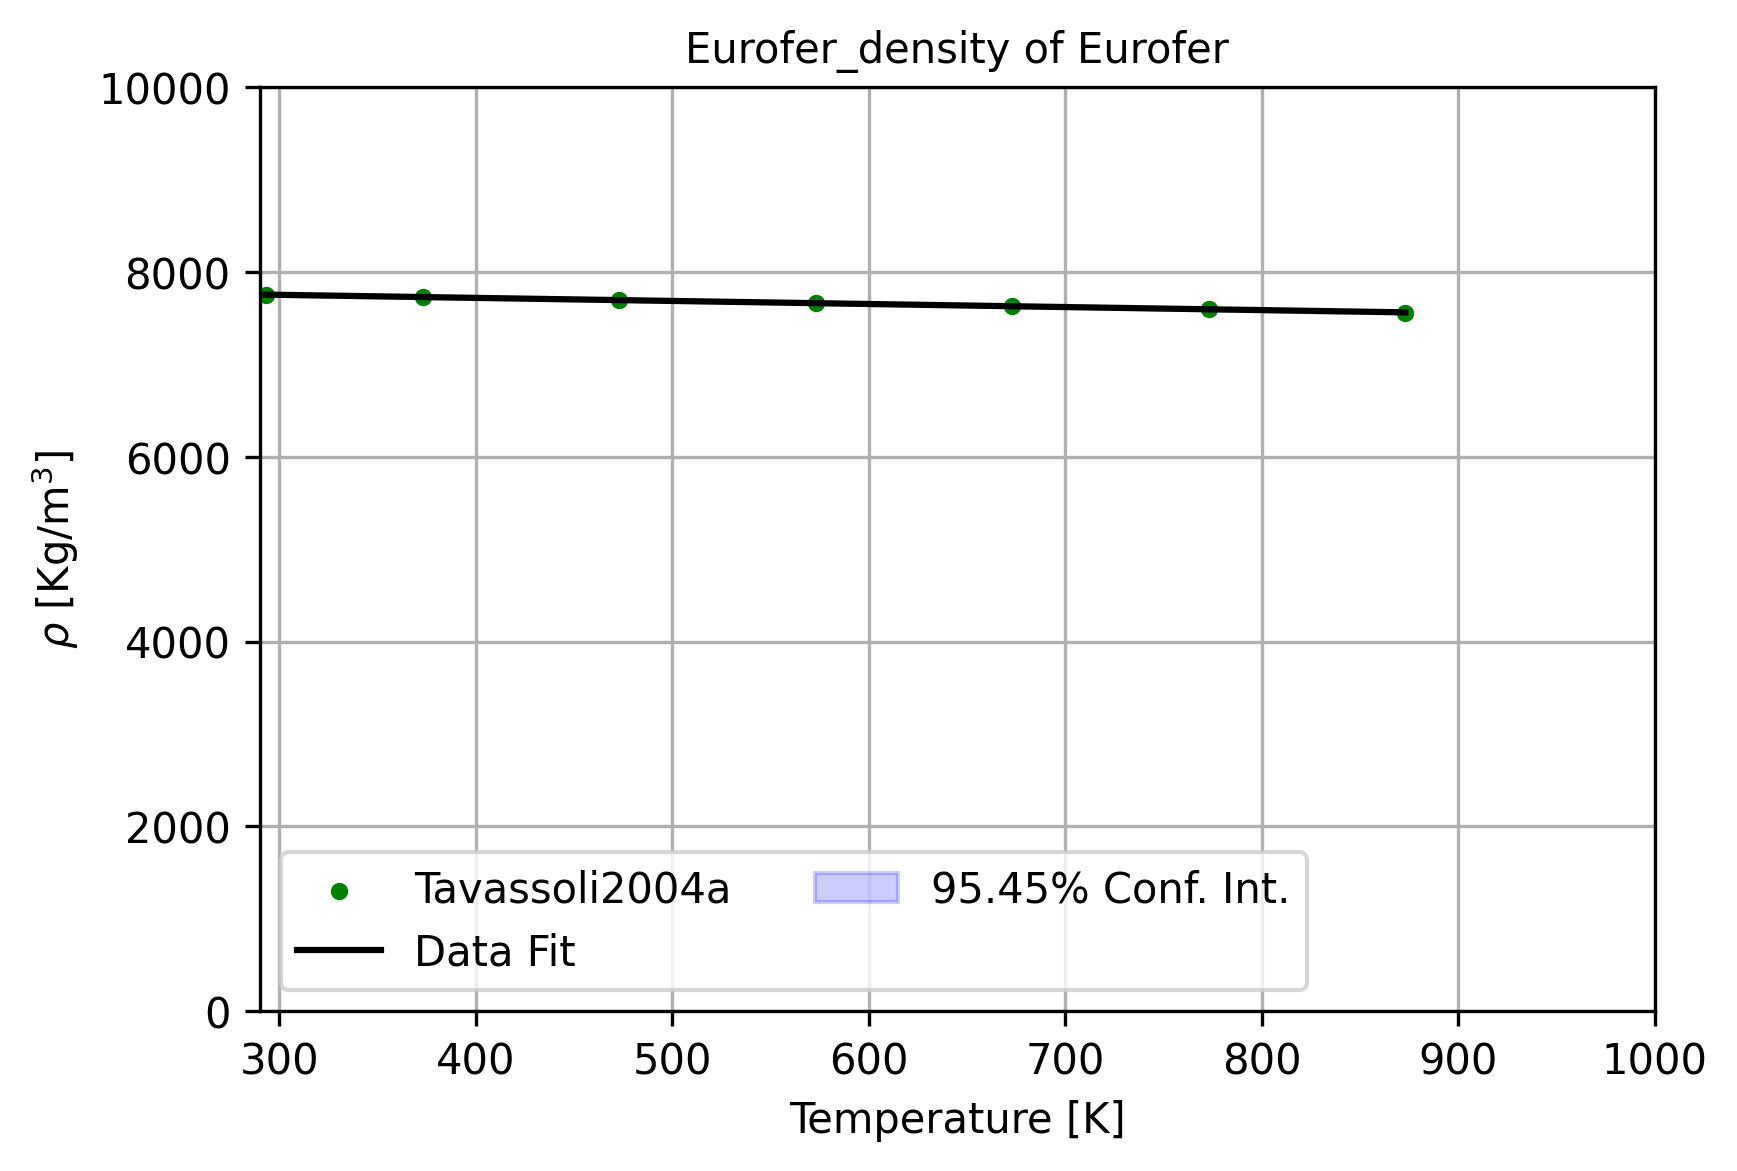

In [86]:
# Temperature range and initializations
T = np.arange(300, 1000, 10)
n = len(T)

# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]
T, rho = concatenate_and_sort(vars_x, vars_y)

x_data_list = [x for x in vars_x]
y_data_list = vars_y
data_colors = ['green', 'red', 'magenta', 'blue', 'cyan', 'black']
data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['Tavassoli2004a']

fit_result = get_model_fit_and_print_it(T, rho, fit_func='poly', fit_fun_args_and_initials={'a':1, 'b':1}, material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

custom_multi_plot(x_data_list, y_data_list,
                  x_label='Temperature [K]', y_label=r'$\rho$ [Kg/m$^3$]', title=material_property + " of " + material_name,
                  scale='linear', font_size=fsize, xlim=[290, 1000], ylim=[0, 10000], 
                  grid=True, legend=True, data_labels=data_labels, fit_labels=None,
                  data_colors=data_colors, fit_colors=None, data_marker_sizes=data_marker_sizes, 
                  fit_line_widths=[2], x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize, 
                  legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2)

plot_fit_and_conf(T, fit_result, sigma=2, legend=True, legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2, fit_line_color='red', pred_int_fill_color='grey', conf_int_fill_color='blue')

Data Source:[Tavassoli 2004](https://github.com/ZapOrg/ZapRepo/blob/main/RAFM%20Steels/Eurofer/Tavassoli2004--Fusion%20Demo%20Interim%20Structural%20Design%20Criteria%20(DISDC).pdf.pdf)

<a id=diffusivity></a>
<h3>2.2. Thermal Diffusivity</h3>

In [87]:
material_property = "Eurofer_diffusivity"
var_names, variables = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=11, room_temp=293)

,EUROFER97MergiaTempK,EUROFER97MergiaThermalDiffusivityCoefcm2/s
0,295.595855,0.081641
1,322.797927,0.080790
2,373.316062,0.077536
3,472.797927,0.075784
4,573.056995,0.070729
5,673.316062,0.064822
6,772.797927,0.058014
7,873.056995,0.050256


**Fitting parameters for Eurofer Eurofer_diffusivity** 


[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 8
    # variables        = 3
    chi-square         = 2.6948e-06
    reduced chi-square = 5.3897e-07
    Akaike info crit   = -113.228942
    Bayesian info crit = -112.990617
    R-squared          = 0.99701563
[[Variables]]
    a: -5.0637e-08 +/- 8.3333e-09 (16.46%) (init = 1)
    b:  5.7279e-06 +/- 9.6212e-06 (167.97%) (init = 1)
    c:  0.08388973 +/- 0.00249931 (2.98%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9909
    C(b, c) = -0.9831
    C(a, c) = +0.9539


**The equation for Eurofer Eurofer_diffusivity is:**


-5.06371e-8*T**2 + 5.72789e-6*T + 0.0838897

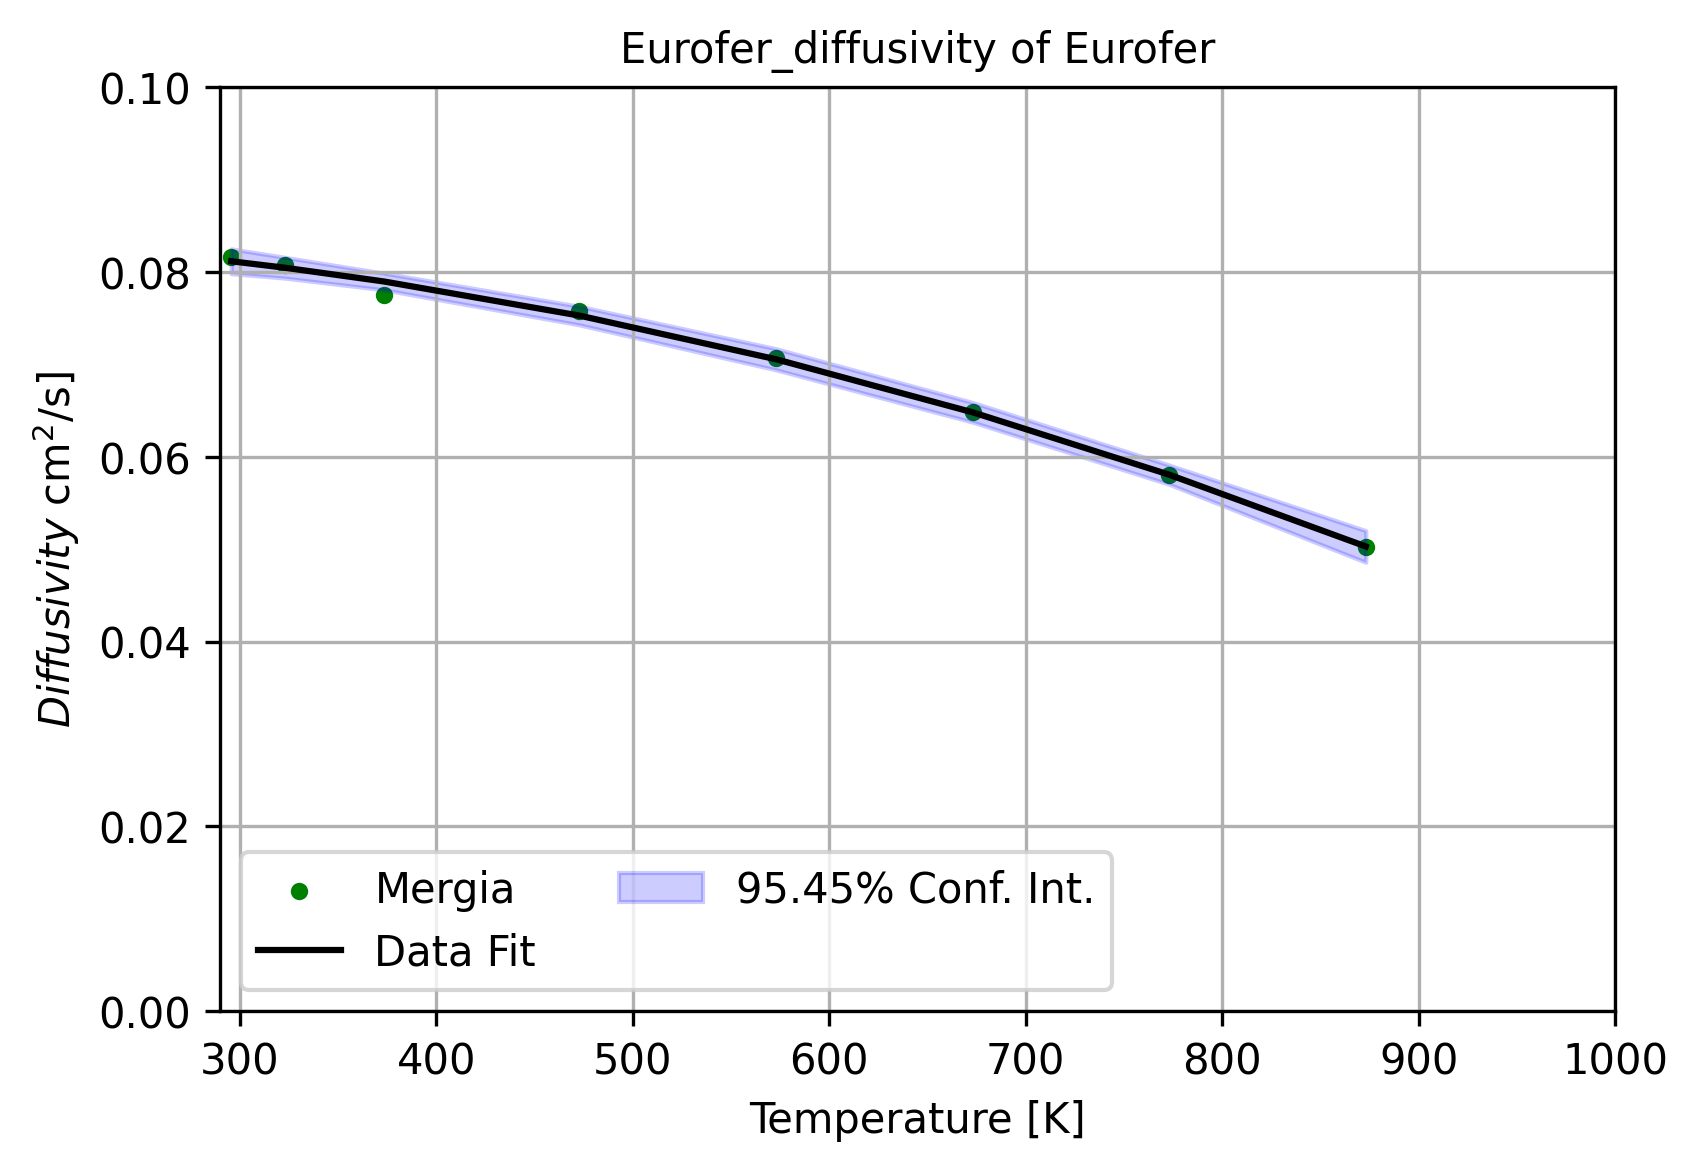

In [88]:
T = np.arange(300, 1000, 10)
n = len(T)

vars_x = variables[::2] 
vars_y = variables[1::2]

T, Diff = concatenate_and_sort(vars_x, vars_y)

x_data_list = [x for x in vars_x]
y_data_list = vars_y
data_colors = ['green', 'red', 'magenta', 'blue', 'cyan', 'black']
data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['Mergia']

fit_result = get_model_fit_and_print_it(T, Diff, fit_func='poly', fit_fun_args_and_initials={'a':1, 'b':1, 'c':1}, material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

custom_multi_plot(x_data_list, y_data_list,
                  x_label='Temperature [K]', y_label=r'$Diffusivity$ cm$^2$/s]', title=material_property + " of " + material_name,
                  scale='linear', font_size=fsize, xlim=[290, 1000], ylim=[0, 0.1], 
                  grid=True, legend=True, data_labels=data_labels, fit_labels=None,
                  data_colors=data_colors, fit_colors=None, data_marker_sizes=data_marker_sizes, 
                  fit_line_widths=[2], x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize,\
                  legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2)

plot_fit_and_conf(T, fit_result, sigma=2, legend=True, legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2,\
                  fit_line_color='red', pred_int_fill_color='grey', conf_int_fill_color='blue')

<a id=cp></a>
<h3>2.3. Specific Heat</h3>

In [89]:
material_property = "Eurofer_specific_heat"
var_names, variables = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=27, room_temp=293)

,EUROFER97MergiaTempK,EUROFER97MergiaSpecificHeatJ/kgK,EUROFER97TempC,EUROFER97SpecificHeatJ/kgK
0,296.103896,448.395379,20.54795,454.68159
1,322.727273,461.489089,53.42466,467.34914
2,348.051948,475.353017,100.00000,488.52065
3,373.376623,485.365854,152.05479,509.65287
4,398.051948,496.148909,201.36986,522.20258
5,423.376623,504.621309,250.68493,543.35445
6,447.402597,513.863928,300.00000,551.60308
7,472.727273,521.566110,349.31507,572.75495
8,498.051948,530.038511,398.63014,585.30466
9,522.727273,536.970475,450.68493,610.73796


**Fitting parameters for Eurofer Eurofer_specific_heat** 


[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 39
    # variables        = 3
    chi-square         = 329660.759
    reduced chi-square = 9157.24331
    Akaike info crit   = 358.648052
    Bayesian info crit = 363.638737
    R-squared          = 0.46769158
[[Variables]]
    a:  3.4806e-04 +/- 2.7982e-04 (80.39%) (init = 1)
    b:  0.05798935 +/- 0.26828778 (462.65%) (init = 1)
    c:  464.452994 +/- 59.4687796 (12.80%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9660
    C(b, c) = -0.8975
    C(a, c) = +0.7745


**The equation for Eurofer Eurofer_specific_heat is:**


0.000348064*T**2 + 0.0579894*T + 464.453

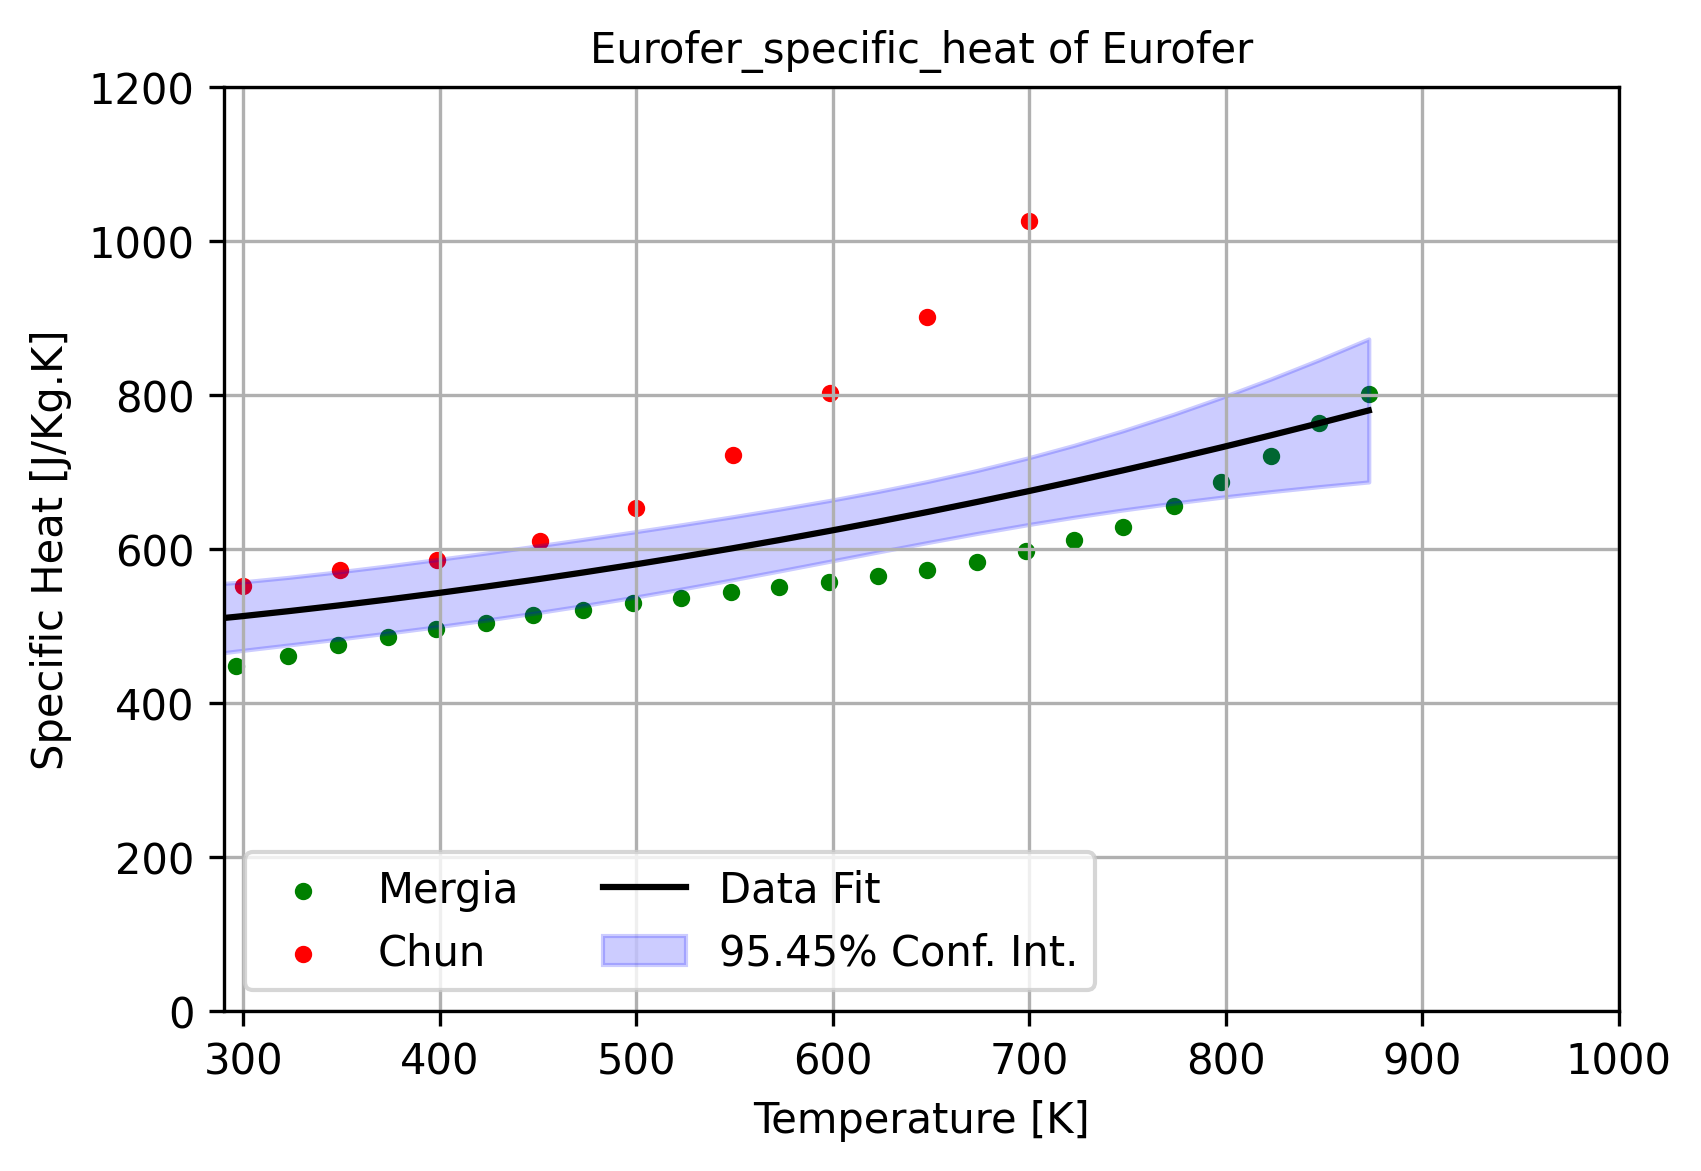

In [90]:
# Temperature range and initializations
T = np.arange(300, 1000, 10)
n = len(T)

vars_x = variables[::2]
vars_y = variables[1::2]

T, cp = concatenate_and_sort(vars_x, vars_y)

x_data_list = [x for x in vars_x]
y_data_list = vars_y
data_colors = ['green', 'red', 'magenta', 'blue', 'cyan', 'black']
data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['Mergia','Chun']

fit_result = get_model_fit_and_print_it(T, cp, fit_func='poly', fit_fun_args_and_initials={'a':1, 'b':1, 'c':1}, material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

custom_multi_plot(x_data_list, y_data_list,
                  x_label='Temperature [K]', y_label=r'Specific Heat [J/Kg.K]', title=material_property + " of " + material_name,
                  scale='linear', font_size=fsize, xlim=[290, 1000], ylim=[0, 1200], 
                  grid=True, legend=True, data_labels=data_labels, fit_labels=None,
                  data_colors=data_colors, fit_colors=None, data_marker_sizes=data_marker_sizes, 
                  fit_line_widths=[2], x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize,\
                  legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2)

plot_fit_and_conf(T, fit_result, sigma=2, legend=True, legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2,\
                  fit_line_color='red', pred_int_fill_color='grey', conf_int_fill_color='blue')

<a id=cp></a>
<h3>2.4. Conductivity</h3>

In [91]:
material_property = "Eurofer_conductivity"
var_names, variables = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=16, room_temp=293)

,EUROFER97MergiaTempK,EUROFER97MergiaThermalConductivitykW/mK,EUROFER97TempC,EUROFER97ThermalConductivityW/mK
0,295.833333,28.330097,20.54795,28.15894
1,322.619048,28.932039,50.68493,28.88742
2,372.619048,29.194175,102.73973,29.74834
3,473.214286,30.669903,152.05479,30.27815
4,572.619048,30.194175,201.36986,30.34437
5,672.619048,29.330097,253.42466,30.21192
6,772.619048,29.446602,300.00000,29.94702
7,872.619048,31.174757,352.05479,29.68212
8,NaN,NaN,401.36986,29.48344
9,NaN,NaN,450.68493,29.35099


**Fitting parameters for Eurofer Eurofer_conductivity** 


[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 21
    # variables        = 3
    chi-square         = 10.0894511
    reduced chi-square = 0.56052506
    Akaike info crit   = -9.39367214
    Bayesian info crit = -6.26010483
    R-squared          = 0.21005397
[[Variables]]
    a: -1.8031e-07 +/- 2.7878e-06 (1546.12%) (init = 1)
    b:  0.00174684 +/- 0.00246917 (141.35%) (init = 1)
    c:  29.0708830 +/- 0.48682262 (1.67%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9554
    C(b, c) = -0.8751
    C(a, c) = +0.7331


**The equation for Eurofer Eurofer_conductivity is:**


-1.80309e-7*T**2 + 0.00174684*T + 29.0709

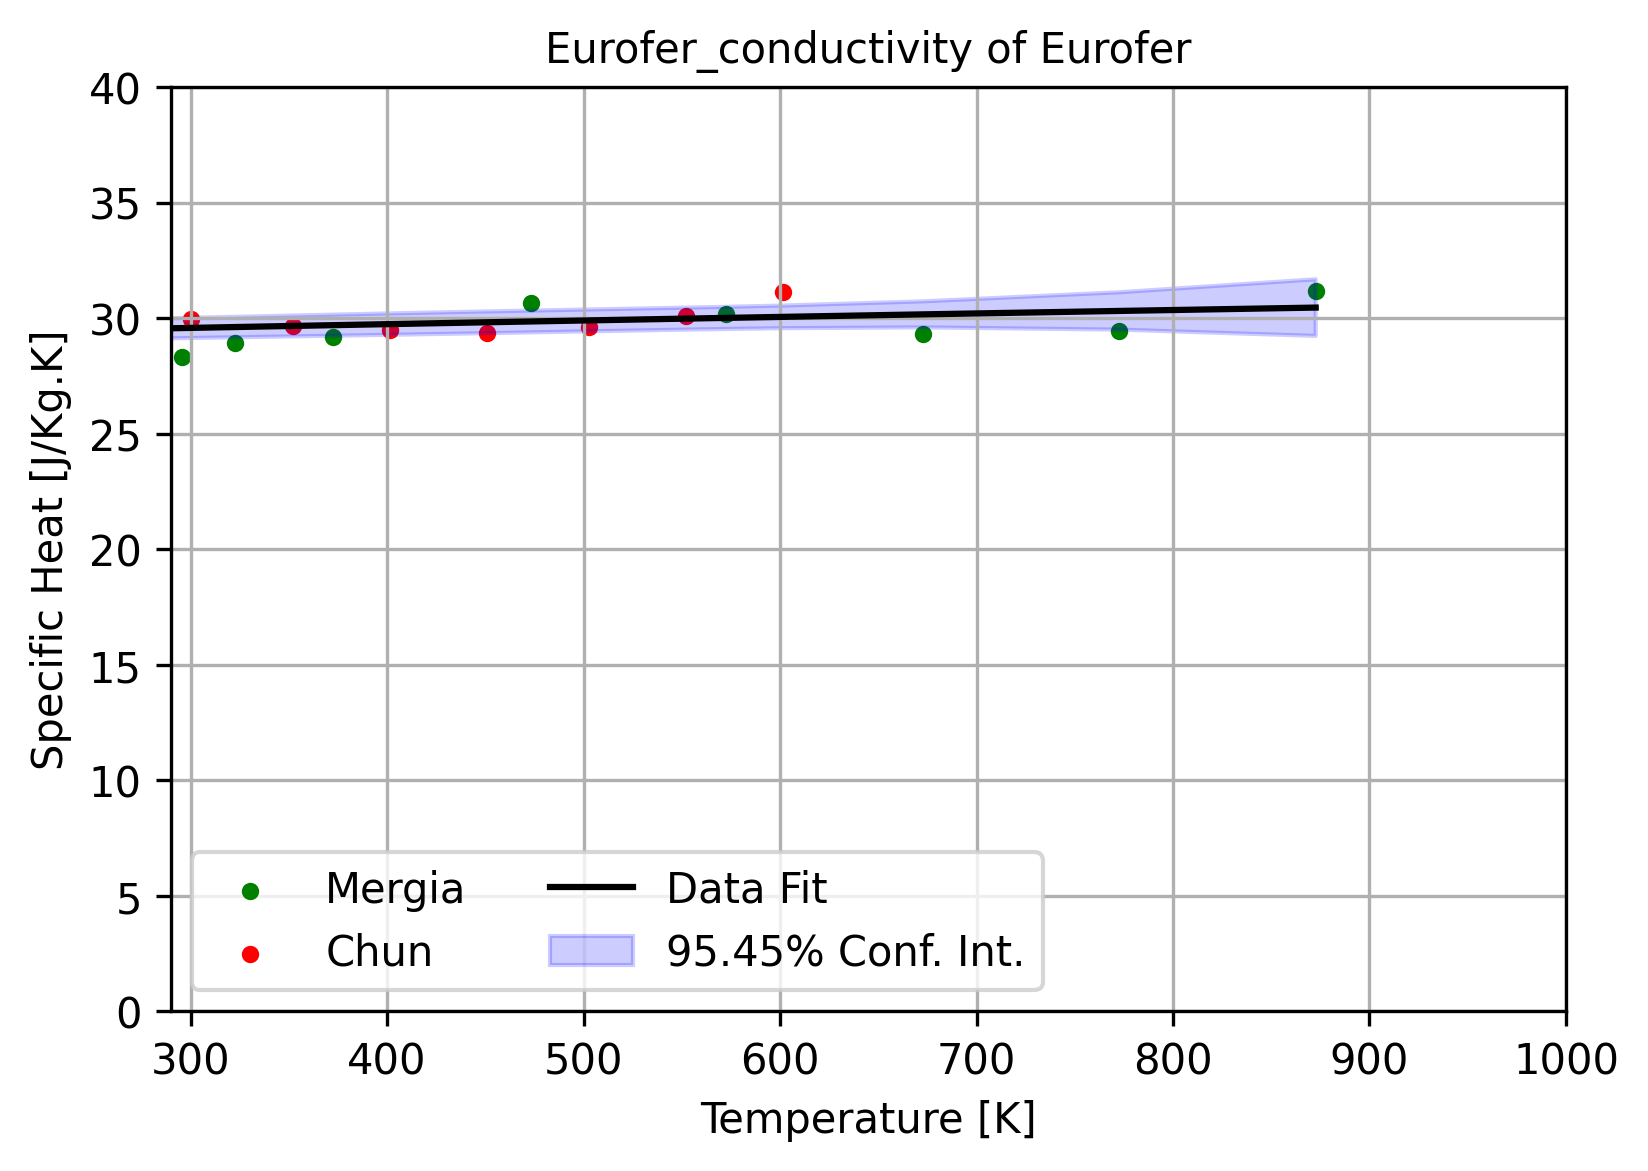

In [92]:
# Temperature range and initializations
T = np.arange(300, 1000, 10)
n = len(T)

# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]

T, k = concatenate_and_sort(vars_x, vars_y)

x_data_list = [x for x in vars_x]
y_data_list = vars_y
data_colors = ['green', 'red', 'magenta', 'blue', 'cyan', 'black']
data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['Mergia','Chun']

fit_result = get_model_fit_and_print_it(T, k, fit_func='poly', fit_fun_args_and_initials={'a':1, 'b':1, 'c':1}, material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

custom_multi_plot(x_data_list, y_data_list,
                  x_label='Temperature [K]', y_label=r'Specific Heat [J/Kg.K]', title=material_property + " of " + material_name,
                  scale='linear', font_size=fsize, xlim=[290, 1000], ylim=[0, 40], 
                  grid=True, legend=True, data_labels=data_labels, fit_labels=None,
                  data_colors=data_colors, fit_colors=None, data_marker_sizes=data_marker_sizes, 
                  fit_line_widths=[2], x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize, 
                  legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2)

plot_fit_and_conf(T, fit_result, sigma=2, legend=True, legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2,
                  fit_line_color='red', pred_int_fill_color='grey', conf_int_fill_color='blue')

<a id=cp></a>
<h3>2.5. Resistivity</h3>

In [93]:
material_property = "Eurofer_resistivity"
var_names, variables = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=23, room_temp=293)

,EUROFER97MergiaTempK,EUROFER97MergiaElectricalResistivityx108ohmm
0,303.317972,51.077844
1,327.649770,54.550898
2,344.239631,56.467066
3,365.806452,59.101796
4,396.221198,62.814371
5,423.317972,66.407186
6,450.414747,69.281437
7,467.004608,71.437126
8,497.419355,75.508982
9,523.410138,77.425150


**Fitting parameters for Eurofer Eurofer_resistivity** 


[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 23
    # variables        = 2
    chi-square         = 16.3086999
    reduced chi-square = 0.77660476
    Akaike info crit   = -3.90729680
    Bayesian info crit = -1.63630837
    R-squared          = 0.99845936
[[Variables]]
    a:  0.11421584 +/- 9.7904e-04 (0.86%) (init = 1)
    b:  17.8396724 +/- 0.60856872 (3.41%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9533


**The equation for Eurofer Eurofer_resistivity is:**


0.114216*T + 17.8397

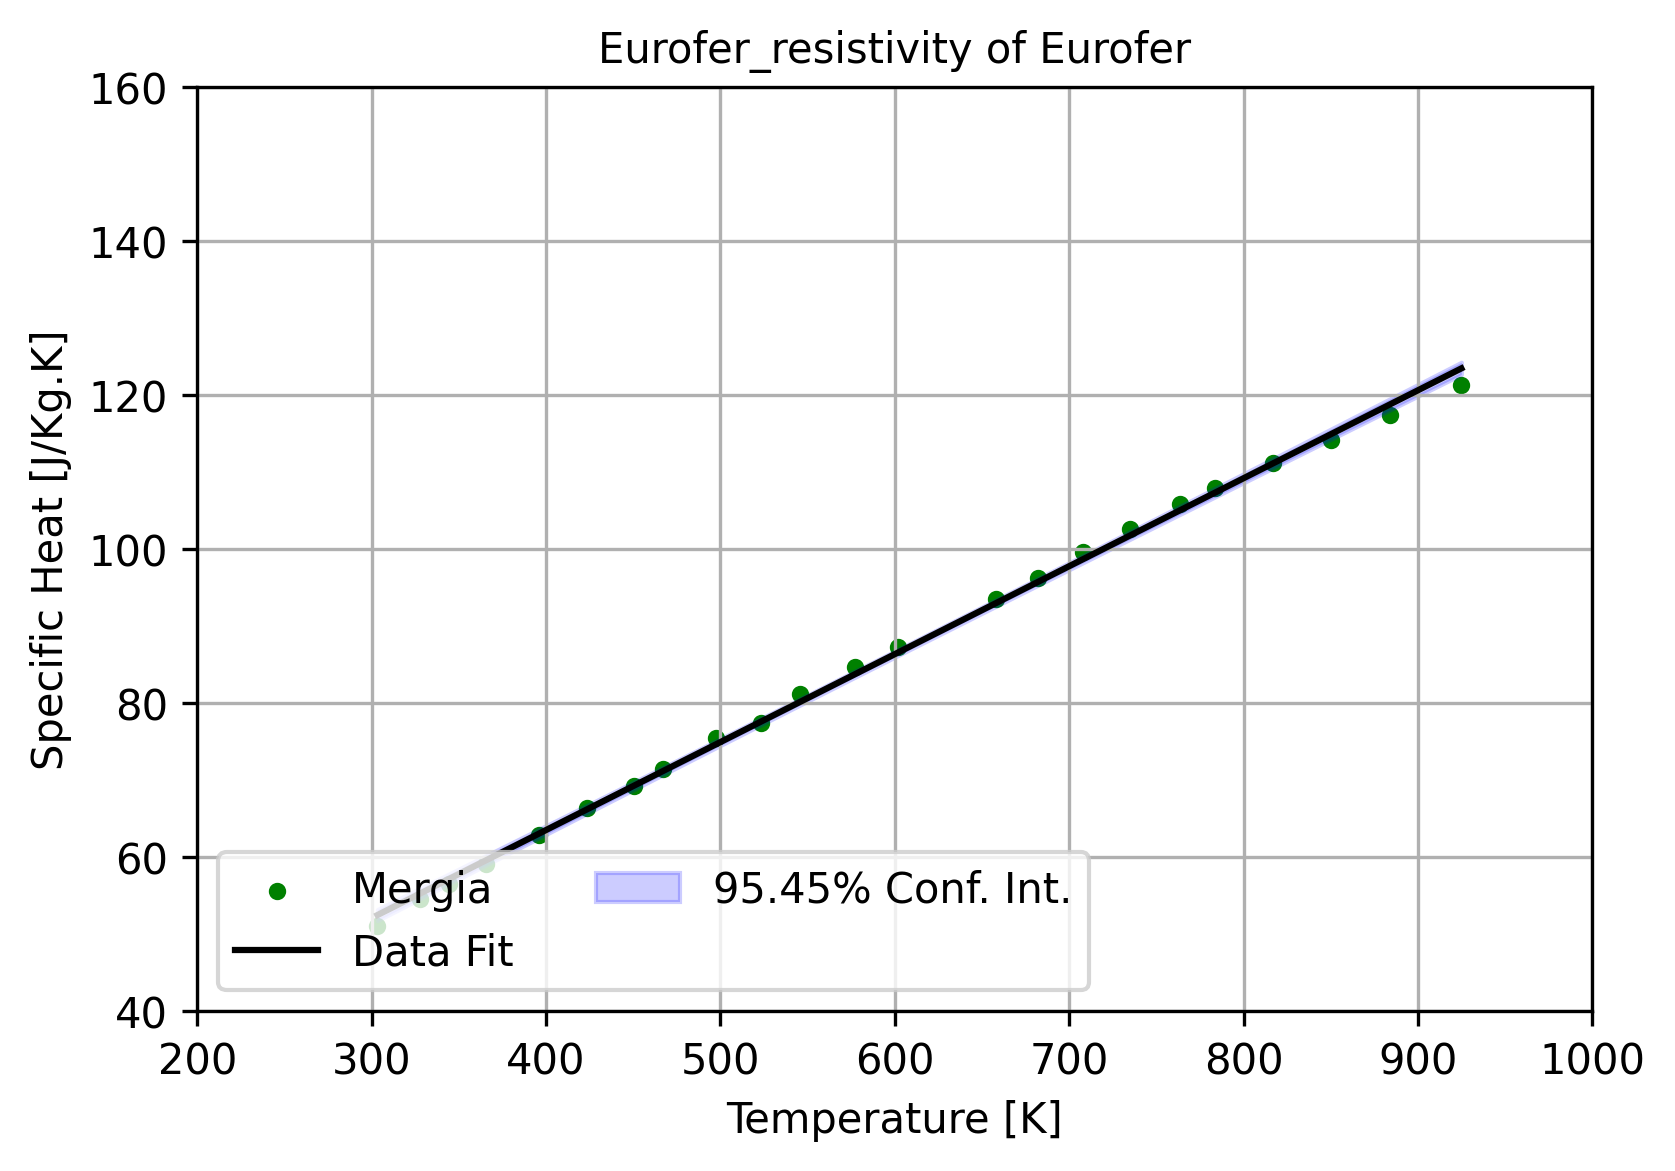

In [94]:
# Temperature range and initializations
T = np.arange(300, 1000, 10)
n = len(T)

# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]

T, k = concatenate_and_sort(vars_x, vars_y)

x_data_list = [x for x in vars_x]
y_data_list = vars_y
data_colors = ['green', 'red', 'magenta', 'blue', 'cyan', 'black']
data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['Mergia']

fit_result = get_model_fit_and_print_it(T, k, fit_func='poly', fit_fun_args_and_initials={'a':1, 'b':1}, material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

custom_multi_plot(x_data_list, y_data_list,
                  x_label='Temperature [K]', y_label=r'Specific Heat [J/Kg.K]', title=material_property + " of " + material_name,
                  scale='linear', font_size=fsize, xlim=[200, 1000], ylim=[40, 160], 
                  grid=True, legend=True, data_labels=data_labels, fit_labels=None,
                  data_colors=data_colors, fit_colors=None, data_marker_sizes=data_marker_sizes, 
                  fit_line_widths=[2], x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize, 
                  legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2)
# 
plot_fit_and_conf(T, fit_result, sigma=2, legend=True, legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2,
                  fit_line_color='red', pred_int_fill_color='grey', conf_int_fill_color='blue')

<a id=cp></a>
<h3>2.6. CTE</h3>

In [95]:
material_property = "Eurofer_CTE"
var_names, variables = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=7, room_temp=293)

,EUROFER97TempC,EUROFER97CoefficientofThermalExpansion
0,100,10.689873
1,200,11.044304
2,300,11.386076
3,400,11.696203
4,500,11.987342
5,600,12.246835
6,700,12.487342


**Fitting parameters for Eurofer Eurofer_CTE** 


[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 7
    # variables        = 2
    chi-square         = 0.01239356
    reduced chi-square = 0.00247871
    Akaike info crit   = -40.3554185
    Bayesian info crit = -40.4635982
    R-squared          = 0.99510452
[[Variables]]
    a:  0.00299955 +/- 9.4088e-05 (3.14%) (init = 1)
    b:  10.4484629 +/- 0.04207741 (0.40%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.8944


**The equation for Eurofer Eurofer_CTE is:**


0.00299955*T + 10.4485

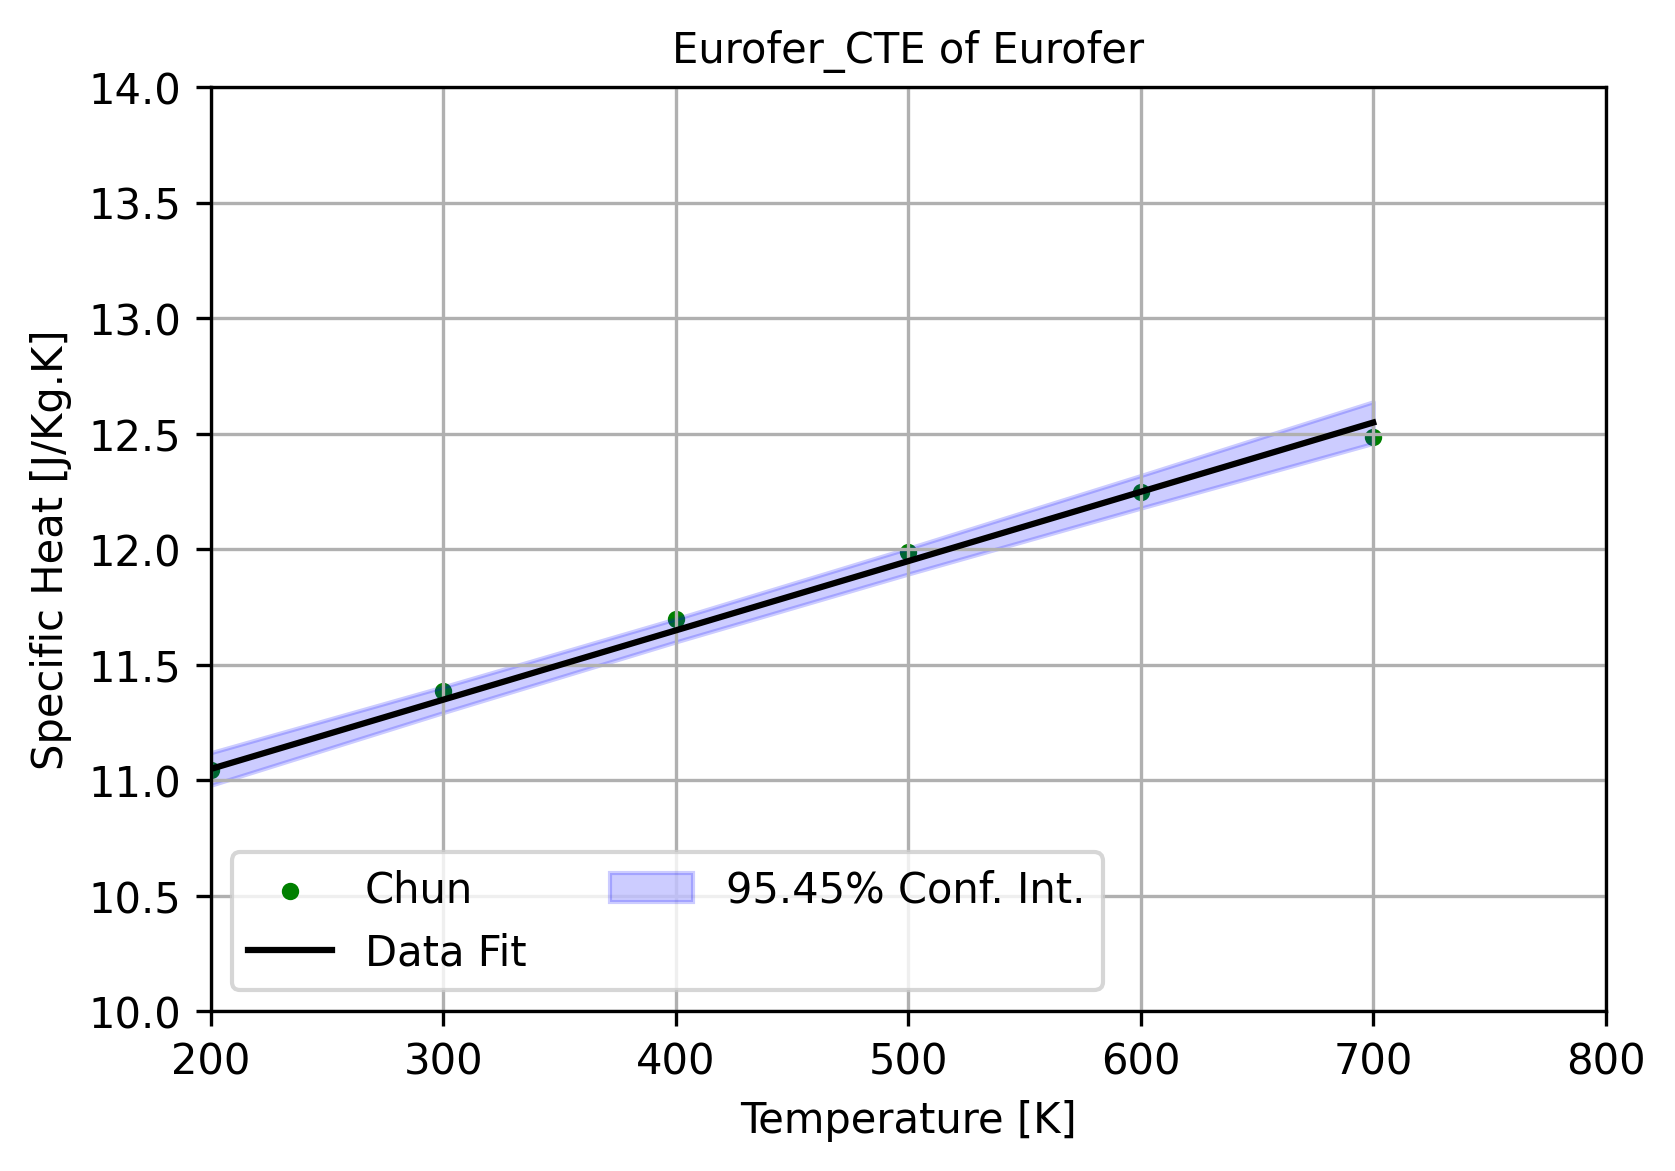

In [96]:
# Temperature range and initializations
T = np.arange(300, 800, 10)
n = len(T)

# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]

T, k = concatenate_and_sort(vars_x, vars_y)

x_data_list = [x for x in vars_x]
y_data_list = vars_y
data_colors = ['green', 'red', 'magenta', 'blue', 'cyan', 'black']
data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['Chun']

fit_result = get_model_fit_and_print_it(T, k, fit_func='poly', fit_fun_args_and_initials={'a':1, 'b':1}, material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

custom_multi_plot(x_data_list, y_data_list,
                  x_label='Temperature [K]', y_label=r'Specific Heat [J/Kg.K]', title=material_property + " of " + material_name,
                  scale='linear', font_size=fsize, xlim=[200, 800], ylim=[10, 14], 
                  grid=True, legend=True, data_labels=data_labels, fit_labels=None,
                  data_colors=data_colors, fit_colors=None, data_marker_sizes=data_marker_sizes, 
                  fit_line_widths=[2], x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize, 
                  legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2)
# 
plot_fit_and_conf(T, fit_result, sigma=2, legend=True, legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2,
                  fit_line_color='red', pred_int_fill_color='grey', conf_int_fill_color='blue')

<a id=cp></a>
<h3>2.7. Emissivity</h3>

In [97]:
material_property = "Eurofer_emissivity"
var_names, variables = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=5, room_temp=293)

,EUROFER97AsrolledTempK,EUROFER97AsrolledHemisphericalEmissivity,EUROFER97PolishedTempK1,EUROFER97PolishedHemisphericalEmissivity1,EUROFER97polishedTempK2,EUROFER97polishedNormalEmissivity
0,473.100872,0.180080,430.136986,0.116901,423,0.083535
1,573.225405,0.214688,524.283935,0.128974,523,0.100909
2,672.976339,0.245272,624.034869,0.142656,623,0.120303
3,772.727273,0.273843,724.906600,0.156338,723,0.140707
4,872.851806,0.302012,820.921544,0.176459,823,0.162929


**Fitting parameters for Eurofer Eurofer_emissivity** 


[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 15
    # variables        = 2
    chi-square         = 0.03463738
    reduced chi-square = 0.00266441
    Akaike info crit   = -87.0630793
    Bayesian info crit = -85.6469789
    R-squared          = 0.39317789
[[Variables]]
    a:  2.7157e-04 +/- 9.3571e-05 (34.46%) (init = 1)
    b: -0.00417130 +/- 0.06137602 (1471.39%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9761


**The equation for Eurofer Eurofer_emissivity is:**


0.000271567*T - 0.0041713

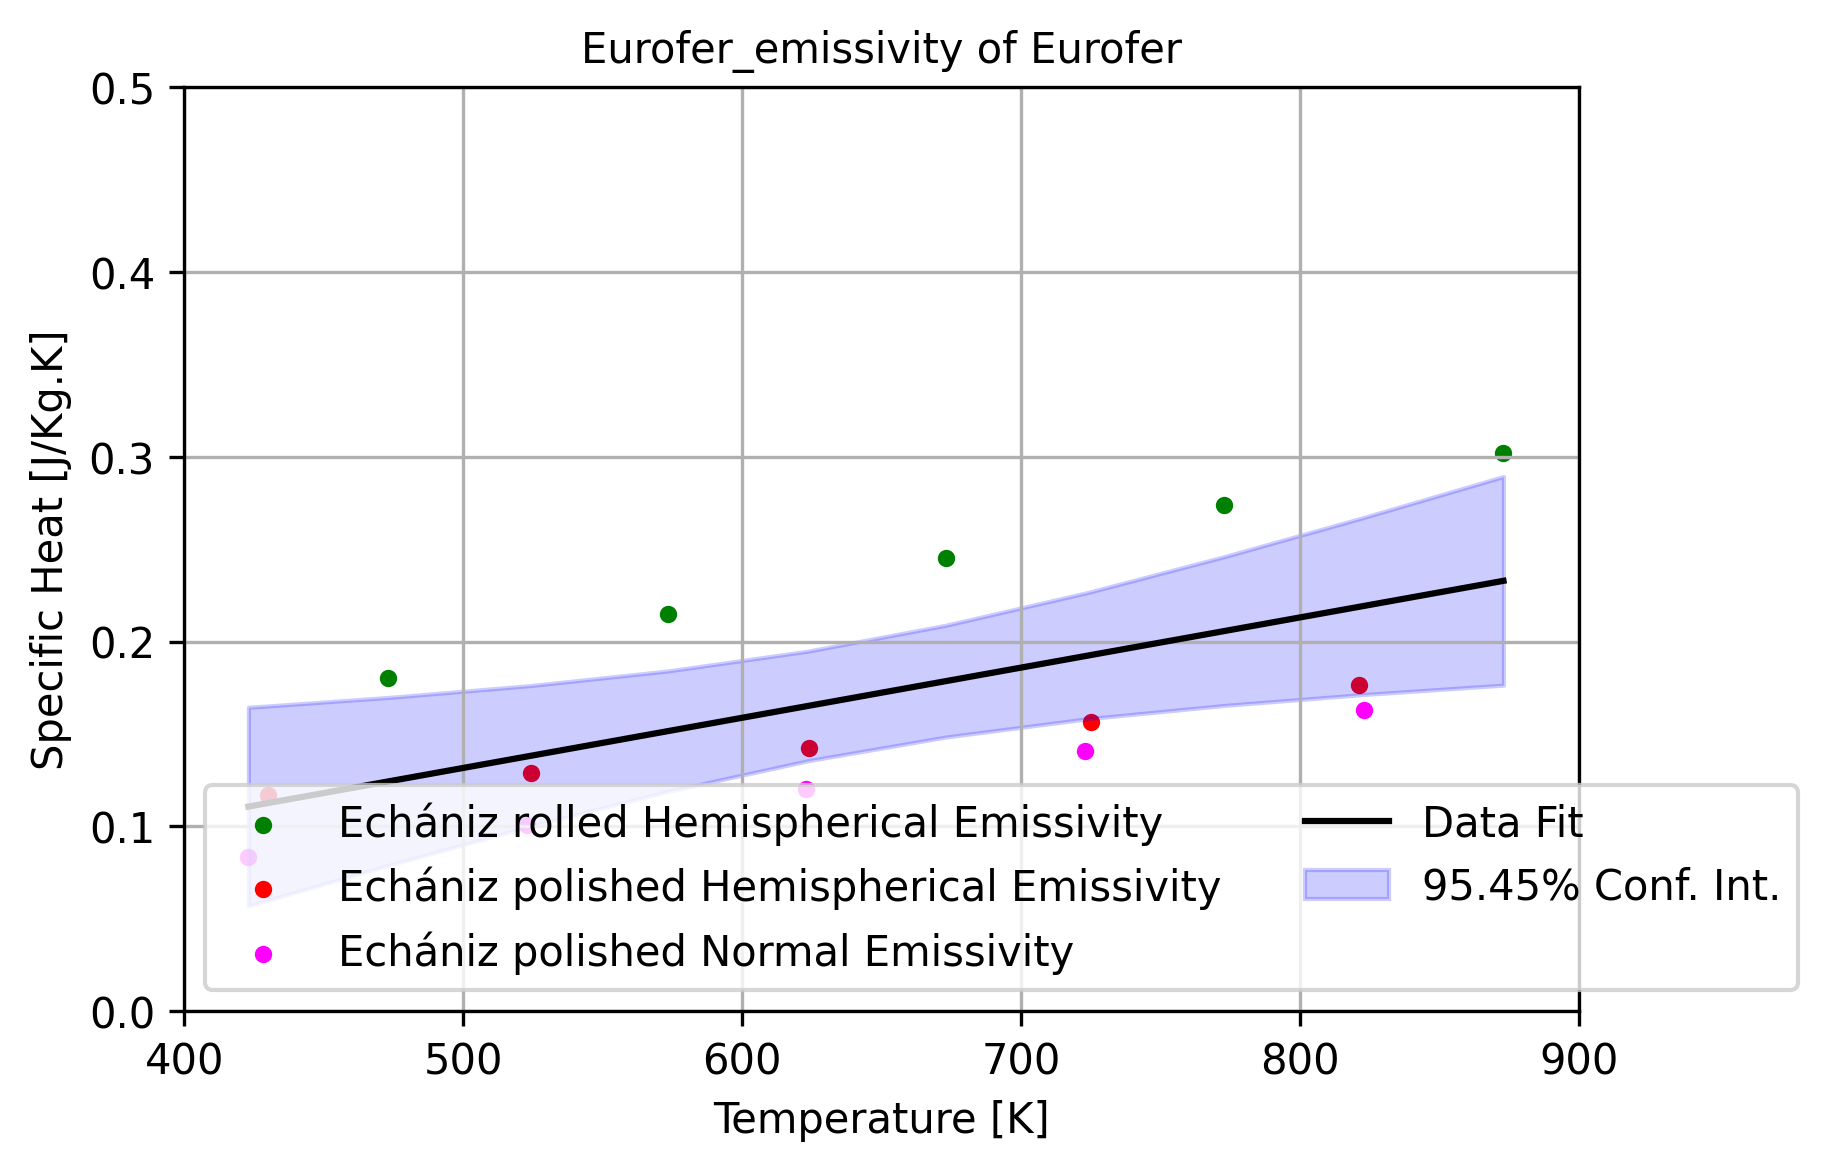

In [98]:
# Temperature range and initializations
T = np.arange(400, 900, 10)
n = len(T)

# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]

T, k = concatenate_and_sort(vars_x, vars_y)

x_data_list = [x for x in vars_x]
y_data_list = vars_y
data_colors = ['green', 'red', 'magenta', 'blue', 'cyan', 'black']
data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['Echániz rolled Hemispherical Emissivity','Echániz polished Hemispherical Emissivity','Echániz polished Normal Emissivity']

fit_result = get_model_fit_and_print_it(T, k, fit_func='poly', fit_fun_args_and_initials={'a':1, 'b':1}, material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

custom_multi_plot(x_data_list, y_data_list,
                  x_label='Temperature [K]', y_label=r'Specific Heat [J/Kg.K]', title=material_property + " of " + material_name,
                  scale='linear', font_size=fsize, xlim=[400, 900], ylim=[0, 0.5], 
                  grid=True, legend=True, data_labels=data_labels, fit_labels=None,
                  data_colors=data_colors, fit_colors=None, data_marker_sizes=data_marker_sizes, 
                  fit_line_widths=[2], x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize, 
                  legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2)
# 
plot_fit_and_conf(T, fit_result, sigma=2, legend=True, legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2,
                  fit_line_color='red', pred_int_fill_color='grey', conf_int_fill_color='blue')

<a id=cp></a>
<h3>2.8. Elastic</h3> 

In [99]:
material_property = "Eurofer_elastic"
var_names, variables = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=9, room_temp=293)

,EuroferETempC,EuroferEElasticModulusGpa
0,17.541148,33.767998
1,147.824743,32.228318
2,297.735878,36.684440
3,447.708832,40.214564
4,498.245885,33.211627
5,548.535662,29.912681
6,599.165443,21.520748
7,648.187930,20.538083
8,698.817711,12.146150


**Fitting parameters for Eurofer Eurofer_elastic** 


[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 9
    # variables        = 4
    chi-square         = 42.7707338
    reduced chi-square = 8.55414676
    Akaike info crit   = 22.0276655
    Bayesian info crit = 22.8165638
    R-squared          = 0.93400315
[[Variables]]
    a: -2.8272e-07 +/- 1.2740e-07 (45.06%) (init = 1)
    b:  1.7263e-04 +/- 1.4258e-04 (82.59%) (init = 1)
    c: -0.01446073 +/- 0.04426019 (306.07%) (init = 1)
    d:  33.2221902 +/- 3.38121354 (10.18%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9857
    C(b, c) = -0.9675
    C(a, c) = +0.9147
    C(c, d) = -0.7680
    C(b, d) = +0.6280
    C(a, d) = -0.5440


**The equation for Eurofer Eurofer_elastic is:**


-2.82717e-7*T**3 + 0.000172633*T**2 - 0.0144607*T + 33.2222

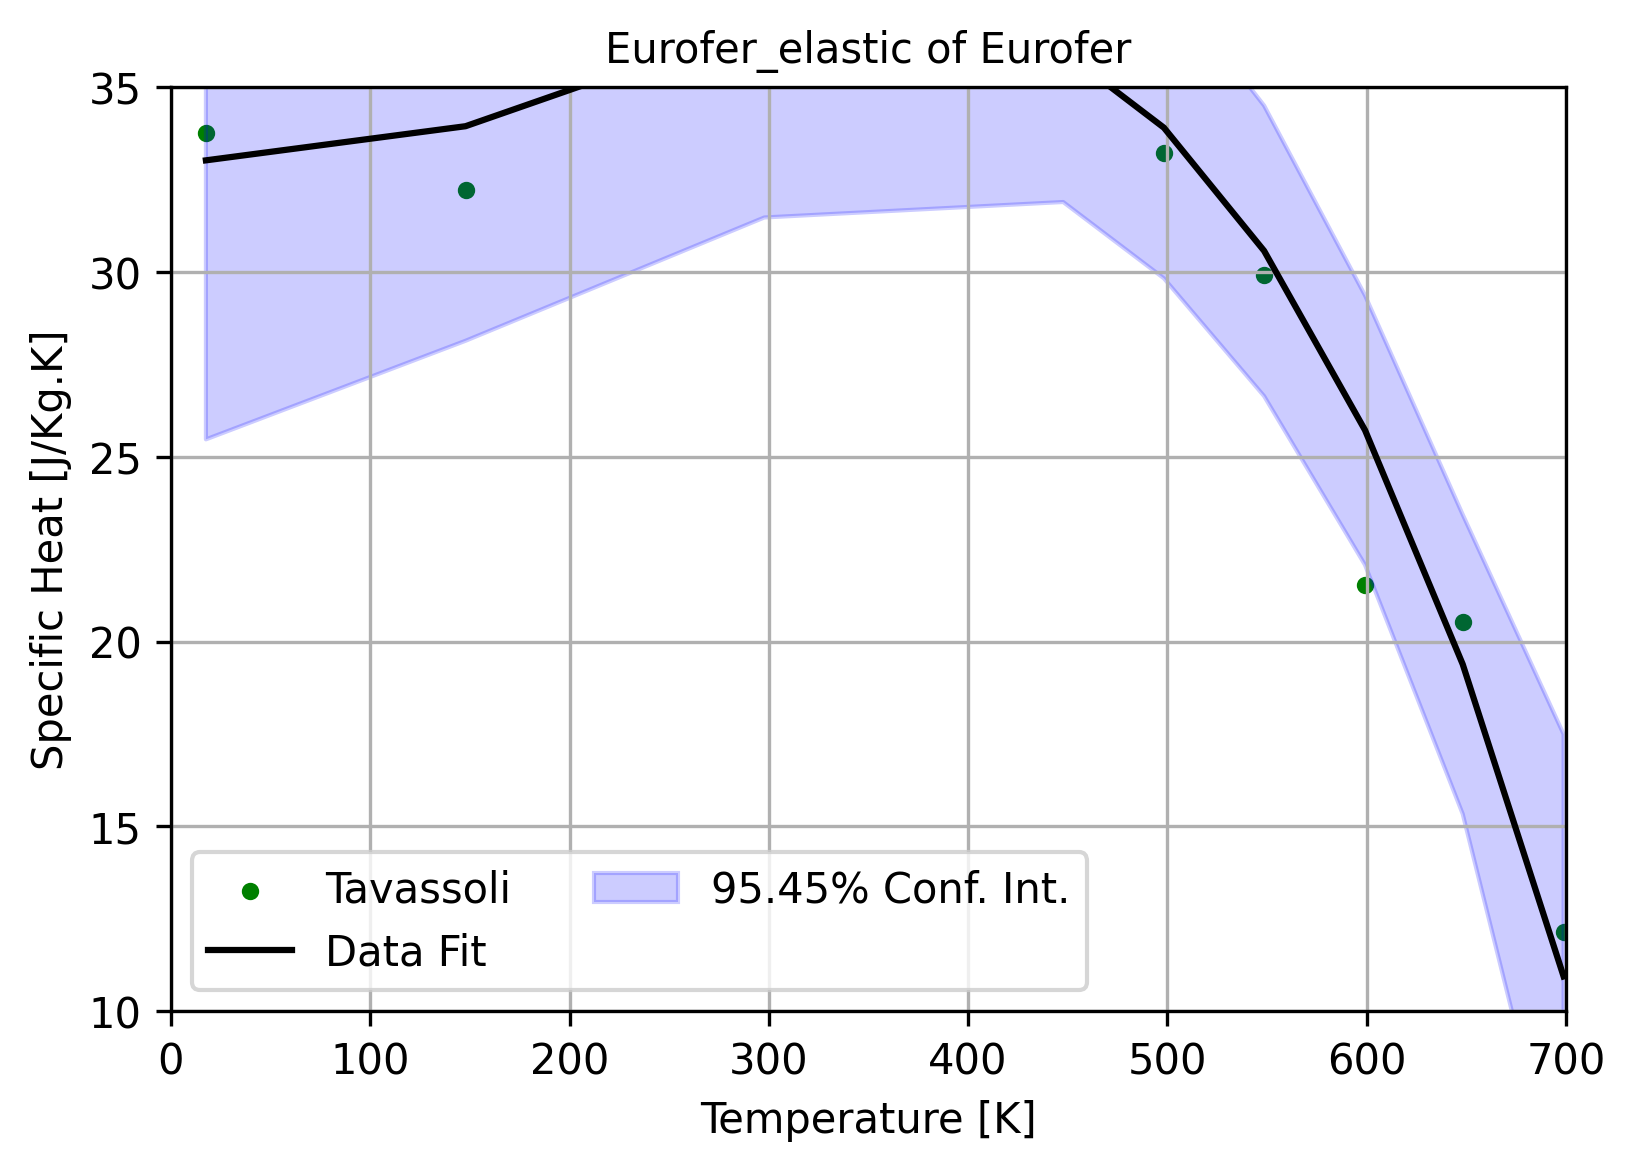

In [100]:
# Temperature range and initializations
T = np.arange(0, 700, 10)
n = len(T)

# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]

T, k = concatenate_and_sort(vars_x, vars_y)

x_data_list = [x for x in vars_x]
y_data_list = vars_y
data_colors = ['green', 'red', 'magenta', 'blue', 'cyan', 'black']
data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['Tavassoli']

fit_result = get_model_fit_and_print_it(T, k, fit_func='poly', fit_fun_args_and_initials={'a':1, 'b':1, 'c':1, 'd':1}, material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

custom_multi_plot(x_data_list, y_data_list,
                  x_label='Temperature [K]', y_label=r'Specific Heat [J/Kg.K]', title=material_property + " of " + material_name,
                  scale='linear', font_size=fsize, xlim=[0, 700], ylim=[10, 35], 
                  grid=True, legend=True, data_labels=data_labels, fit_labels=None,
                  data_colors=data_colors, fit_colors=None, data_marker_sizes=data_marker_sizes, 
                  fit_line_widths=[2], x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize, 
                  legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2)
# 
plot_fit_and_conf(T, fit_result, sigma=2, legend=True, legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2,
                  fit_line_color='red', pred_int_fill_color='grey', conf_int_fill_color='blue')

<a id=cp></a>
<h3>2.9. Hardness</h3m> 

In [101]:
material_property = "Eurofer_hardness"
var_names, variables = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=12, room_temp=293)

,Eurofer97Heat993391_1040CTemperingTempC,Eurofer97Heat993391_1040CHardness,Eurofer97Heat993402_1040CTemperingTempC1,Eurofer97Heat993402_1040CHardness1,Eurofer97Heat993391_980CTemperingTempC2,Eurofer97Heat993391_980CHardness2,Eurofer97Heat993402_980CTemperingTempC3,Eurofer97Heat993402_980CHardness3
0,20,410.294118,20,410.294118,20.0,409.637255,20.0,420.225490
1,650,310.539216,650,309.803922,650.0,305.166667,650.0,300.225490
2,700,264.705882,700,260.049020,700.0,264.578431,700.0,255.049020
3,725,237.745098,750,204.901961,750.0,214.460784,750.0,210.225490
4,775,204.656863,800,195.098039,800.0,199.990196,800.0,199.990196
5,825,234.803922,825,179.656863,825.0,225.049020,825.0,202.813725
6,850,299.509804,850,364.705882,850.0,389.872549,850.0,394.813725
7,950,410.294118,950,414.950980,900.0,405.401961,900.0,410.343137
8,1000,415.196078,1000,419.852941,NaN,NaN,NaN,NaN
9,1050,410.539216,1050,417.156863,NaN,NaN,NaN,NaN


**Fitting parameters for Eurofer Eurofer_hardness** 


[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 46
    # data points      = 40
    # variables        = 6
    chi-square         = 53368.7291
    reduced chi-square = 1569.66850
    Akaike info crit   = 299.844032
    Bayesian info crit = 309.977309
    R-squared          = 0.82710893
[[Variables]]
    a:  8.2346e-11 +/- 2.1674e-11 (26.32%) (init = 1)
    b: -3.1643e-07 +/- 7.8854e-08 (24.92%) (init = 1)
    c:  4.5042e-04 +/- 1.0675e-04 (23.70%) (init = 1)
    d: -0.28210677 +/- 0.06405677 (22.71%) (init = 1)
    e:  67.0251198 +/- 14.7548792 (22.01%) (init = 1)
    f: -818.610902 +/- 271.236377 (33.13%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9994
    C(d, e) = -0.9994
    C(b, c) = -0.9994
    C(c, d) = -0.9994
    C(a, c) = +0.9976
    C(c, e) = +0.9976
    C(b, d) = +0.9976
    C(e, f) = -0.9973
    C(d, f) = +0.9963
    C(a, d) = -0.9946
    C(b, e) = -0.9946
    C(c, f) = -0.994

**The equation for Eurofer Eurofer_hardness is:**


8.23464e-11*T**5 - 3.16435e-7*T**4 + 0.000450423*T**3 - 0.282107*T**2 + 67.0251*T - 818.611

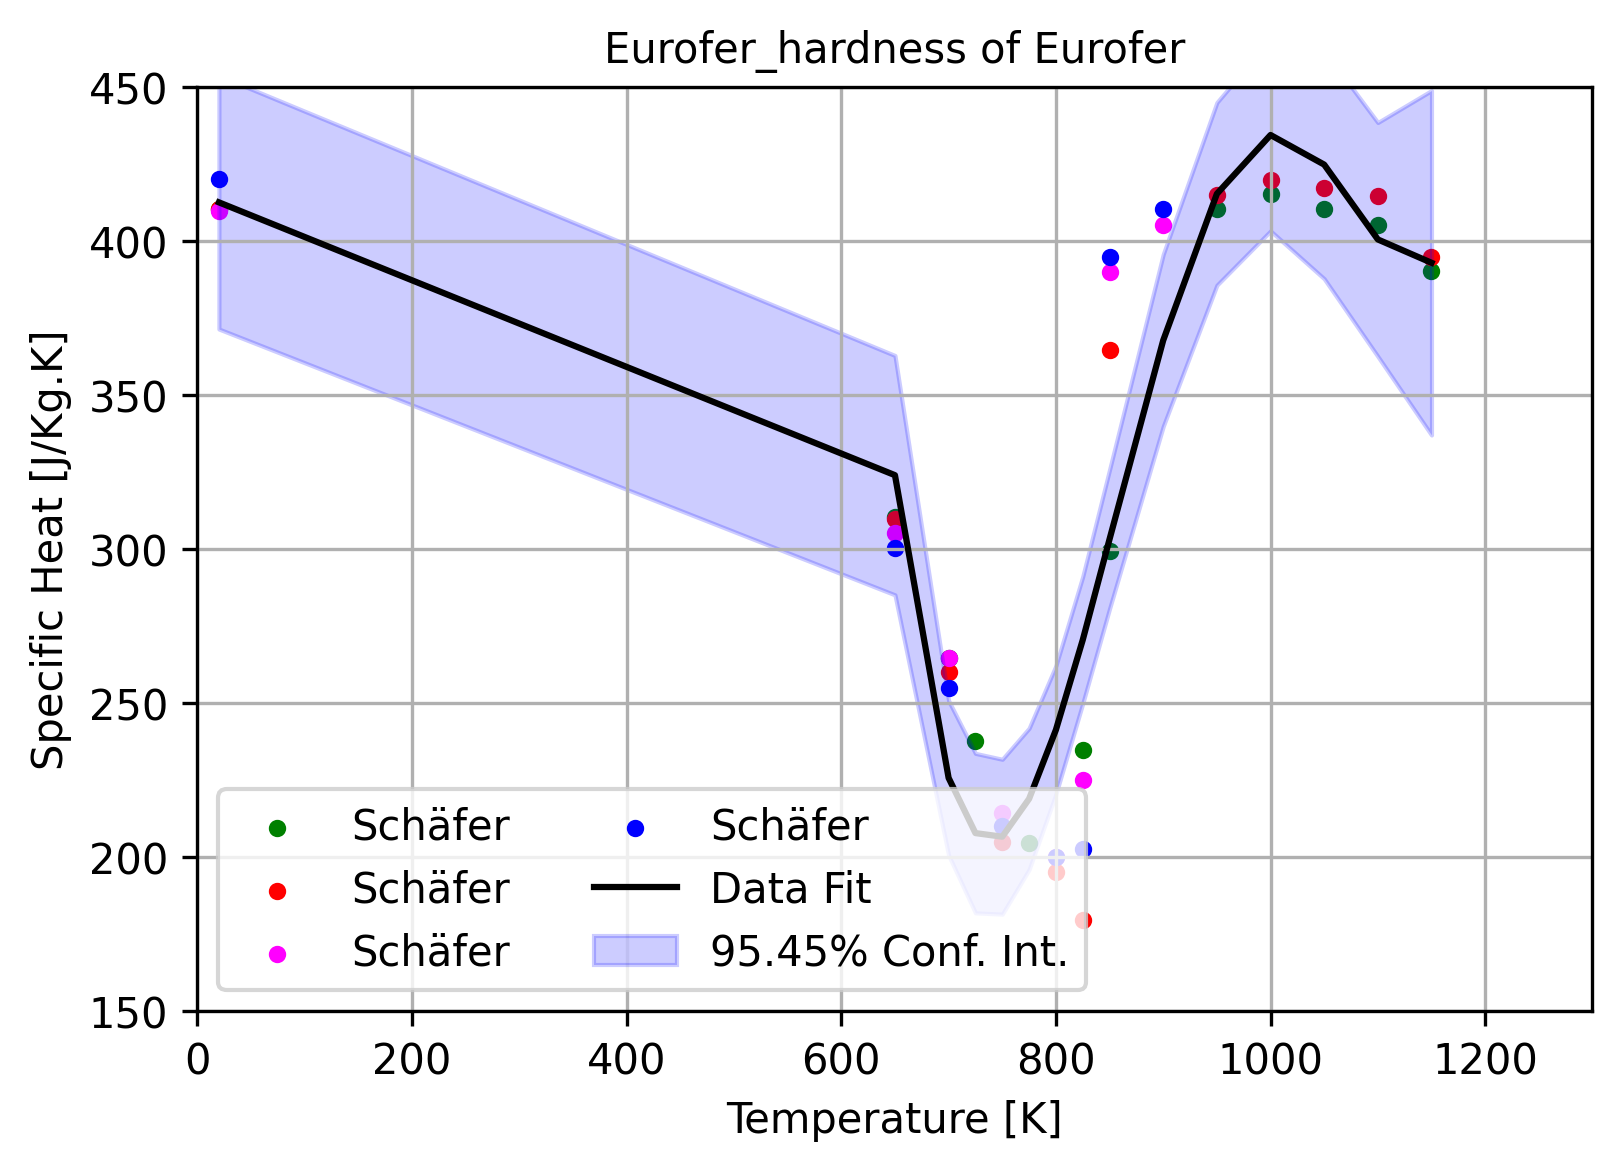

In [102]:
# Temperature range and initializations
T = np.arange(0, 1300, 10)
n = len(T)

# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]

T, k = concatenate_and_sort(vars_x, vars_y)

x_data_list = [x for x in vars_x]
y_data_list = vars_y
data_colors = ['green', 'red', 'magenta', 'blue', 'cyan', 'black']
data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['Schäfer','Schäfer','Schäfer','Schäfer']

fit_result = get_model_fit_and_print_it(T, k, fit_func='poly', fit_fun_args_and_initials={'a':1, 'b':1, 'c':1, 'd':1, 'e':1, 'f':1}, material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

custom_multi_plot(x_data_list, y_data_list,
                  x_label='Temperature [K]', y_label=r'Specific Heat [J/Kg.K]', title=material_property + " of " + material_name,
                  scale='linear', font_size=fsize, xlim=[0, 1300], ylim=[150, 450], 
                  grid=True, legend=True, data_labels=data_labels, fit_labels=None,
                  data_colors=data_colors, fit_colors=None, data_marker_sizes=data_marker_sizes, 
                  fit_line_widths=[2], x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize, 
                  legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2)
# 
plot_fit_and_conf(T, fit_result, sigma=2, legend=True, legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2,
                  fit_line_color='red', pred_int_fill_color='grey', conf_int_fill_color='blue')

<a id=cp></a>
<h3>2.10. Strength</h3m> 

In [103]:
material_property = "Eurofer_strength"
var_names, variables = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=15, room_temp=293)

,EUROFER97TempC,EUROFER97YieldStrengthMPa,EUROFER97SyTempC1,EUROFER97SyYieldStrengthMPa1,EUROFER97SuTempC2,EUROFER97SuUltimateTensileStrengthMPa,EUROFER97ODSSyTempC3,EUROFER97ODSSyYieldStrengthMPa2,EUROFER97ODSSuTempC4,EUROFER97ODSSuUltimateTensileStrengthMPa1,...,EUROFER97E83699600C1050h1TempC15,EUROFER97E83699600C1050h1TensileStrengthMPa5,EUROFER97E83699580C3300hTempC16,EUROFER97E83699580C3300hYieldStrengthMPa9,EUROFER97E83699580C3300h1TempC17,EUROFER97E83699580C3300h1TensileStrengthMPa6,EUROFER97E836991075C+750C+600C1050hTempC18,EUROFER97E836991075C+750C+600C1050hYieldStrengthMPa10,EUROFER97E836991075C+750C+600C1050h1TempC19,EUROFER97E836991075C+750C+600C1050h1TensileStrengthMPa7
0,20,547.858099,20.0,511.72884,20.0,634.60653,293.0,886.0,293.0,1066.0,...,18.333333,662.237762,18.888889,536.111111,7.777778,660.839161,28.333333,509.722222,27.777778,621.678322
1,50,525.368139,100.0,476.28520,100.0,593.93268,300.0,727.0,300.0,913.0,...,298.853211,531.400283,385.068913,450.087873,384.862385,500.990099,298.928025,438.840070,297.477064,505.233380
2,100,508.768407,150.0,461.81125,150.0,570.30981,400.0,741.0,400.0,840.0,...,411.009174,498.868458,489.816233,398.066784,486.009174,424.611033,398.162328,421.265378,398.623853,475.530410
3,150,494.846051,200.0,452.56896,200.0,551.91572,500.0,537.0,500.0,685.0,...,509.403670,419.660537,NaN,NaN,NaN,NaN,509.111792,380.492091,510.091743,399.151344
4,200,486.278447,250.0,445.93818,250.0,534.82883,600.0,330.0,600.0,428.0,...,609.862385,295.898161,NaN,NaN,NaN,NaN,613.169985,270.123023,609.174312,282.461103
5,250,479.317269,300.0,436.69732,300.0,515.12754,700.0,163.0,700.0,247.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,300,471.820616,350.0,427.45072,350.0,495.42626,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,350,462.717537,400.0,410.36382,400.0,466.57318,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,400,448.795181,450.0,388.04959,450.0,432.49275,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,450,427.376171,500.0,353.96629,500.0,389.26197,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Fitting parameters for Eurofer Eurofer_strength** 


[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 133
    # variables        = 4
    chi-square         = 1150038.55
    reduced chi-square = 8915.02752
    Akaike info crit   = 1213.63927
    Bayesian info crit = 1225.20066
    R-squared          = 0.63602582
[[Variables]]
    a: -1.9751e-06 +/- 1.2018e-06 (60.85%) (init = 1)
    b:  7.8103e-04 +/- 0.00126691 (162.21%) (init = 1)
    c: -0.22190604 +/- 0.35738309 (161.05%) (init = 1)
    d:  579.451952 +/- 24.4434161 (4.22%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9882
    C(b, c) = -0.9697
    C(a, c) = +0.9250
    C(c, d) = -0.6965
    C(b, d) = +0.5435
    C(a, d) = -0.4661


**The equation for Eurofer Eurofer_strength is:**


-1.97508e-6*T**3 + 0.000781027*T**2 - 0.221906*T + 579.452

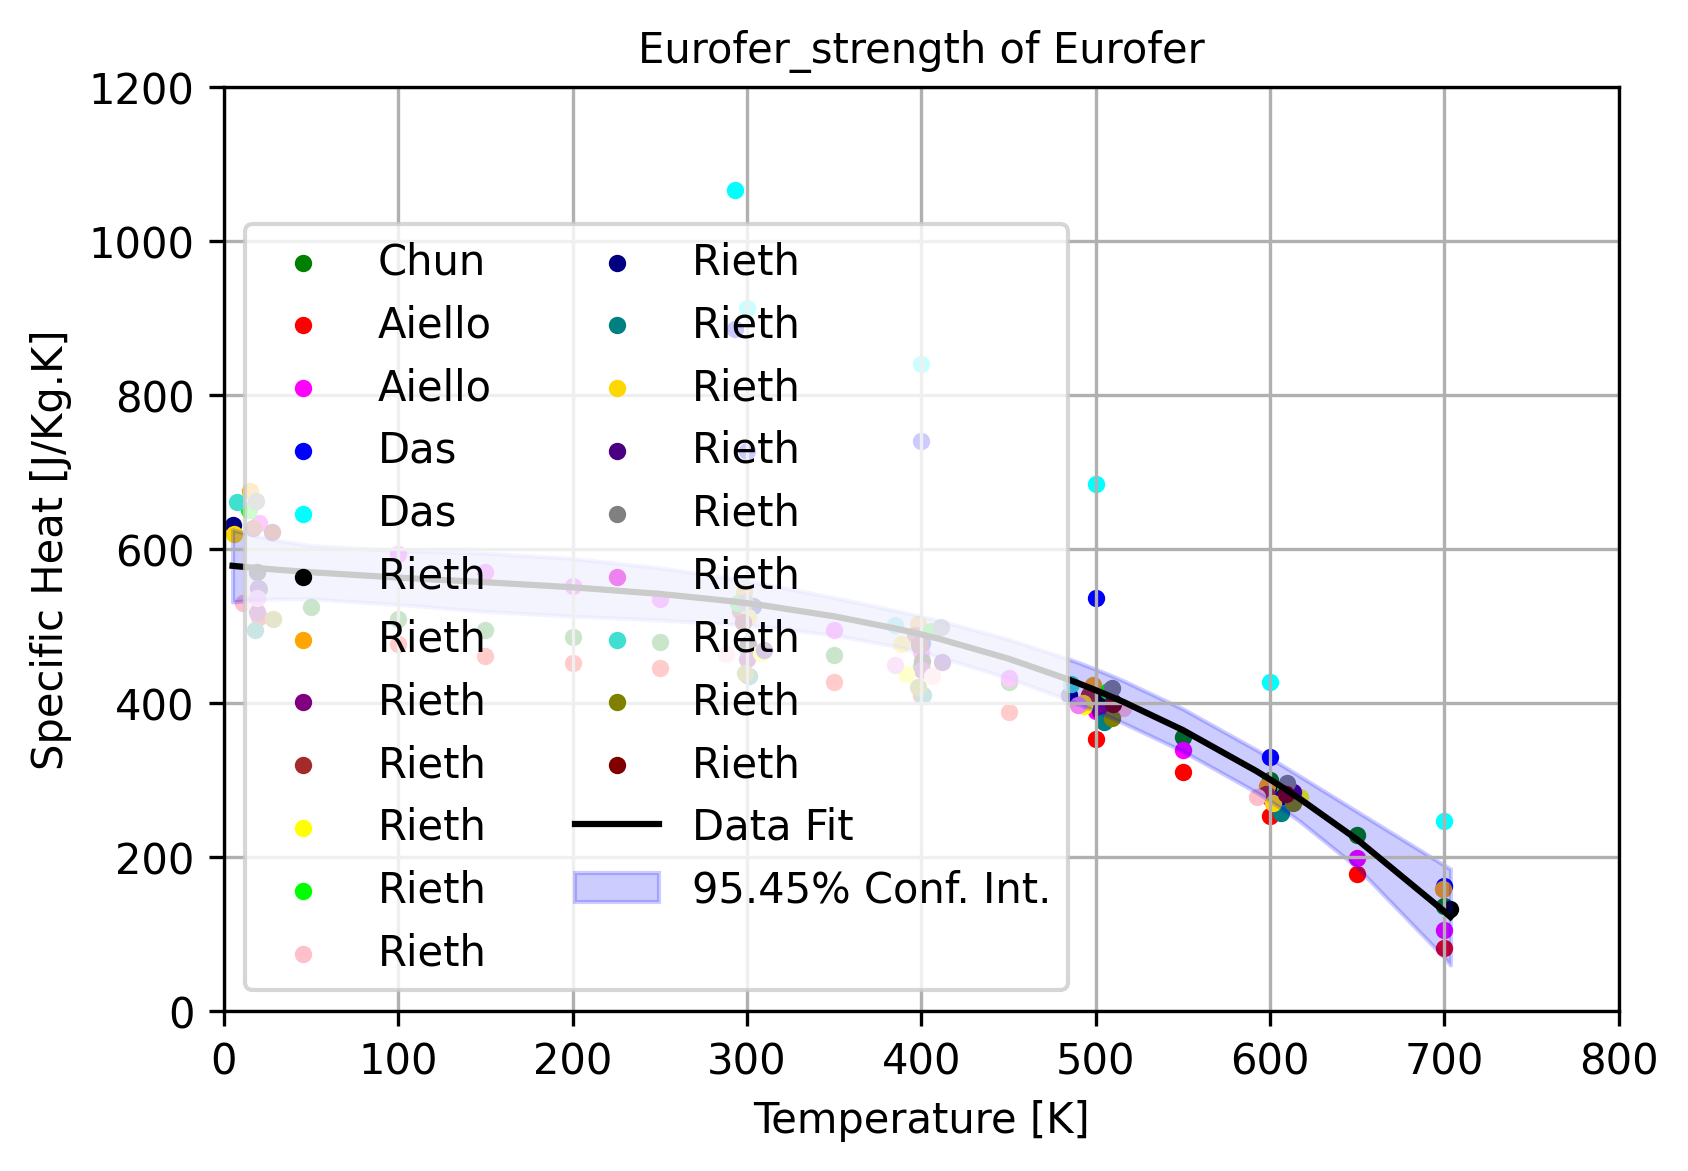

In [104]:
# Temperature range and initializations
T = np.arange(0, 800, 10)
n = len(T)

# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]

T, k = concatenate_and_sort(vars_x, vars_y)

x_data_list = [x for x in vars_x]
y_data_list = vars_y
data_colors = [
    'green', 'red', 'magenta', 'blue', 'cyan', 'black', 'orange', 'purple', 
    'brown', 'yellow', 'lime', 'pink', 'navy', 'teal', 'gold', 'indigo', 
    'gray', 'violet', 'turquoise', 'olive', 'maroon', 'salmon', 'coral'
]
data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['Chun', 'Aiello', 'Aiello', 'Das', 'Das', 'Rieth', 'Rieth', 'Rieth', 'Rieth', 'Rieth', 'Rieth', 'Rieth', 'Rieth', 'Rieth', 'Rieth', 'Rieth', 'Rieth', 'Rieth', 'Rieth', 'Rieth', 'Rieth']

fit_result = get_model_fit_and_print_it(T, k, fit_func='poly', fit_fun_args_and_initials={'a':1, 'b':1, 'c':1, 'd':1}, material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

custom_multi_plot(x_data_list, y_data_list,
                  x_label='Temperature [K]', y_label=r'Specific Heat [J/Kg.K]', title=material_property + " of " + material_name,
                  scale='linear', font_size=fsize, xlim=[0, 800], ylim=[0, 1200], 
                  grid=True, legend=True, data_labels=data_labels, fit_labels=None,
                  data_colors=data_colors, fit_colors=None, data_marker_sizes=data_marker_sizes, 
                  fit_line_widths=[2], x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize, 
                  legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2)
# 
plot_fit_and_conf(T, fit_result, sigma=2, legend=True, legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2,
                  fit_line_color='red', pred_int_fill_color='grey', conf_int_fill_color='blue')

<a id=cp></a>
<h3>2.11. Ductility</h3m> 

In [105]:
material_property = "Eurofer_ductility"
var_names, variables = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=15, room_temp=293)

,EUROFER97TempC,EUROFER97TotalElongation%,EUROFER97AsReceivedTempC1,EUROFER97AsReceivedTotalElongation%1,EUROFER97AsReceived1TempC2,EUROFER97AsReceived1UniformElongation%,EUROFER97Aged650CTempC3,EUROFER97Aged650CTotalElongation%2,EUROFER97Aged650C1TempC4,EUROFER97Aged650C1UniformElongation%1,EUROFER97Aged700CTempC5,EUROFER97Aged700CTotalElongation%3,EUROFER97Aged700C1TempC6,EUROFER97Aged700C1UniformElongation%2
0,20,22.638266,777.659574,17.345858,778.723404,5.424248,777.659574,20.911318,780.851064,6.316403,782.978723,20.634742,780.851064,7.319188
1,50,21.330344,776.595745,18.738221,443.617021,2.180011,784.042553,23.866335,440.425532,2.680219,779.787234,23.641913,779.787234,9.157233
2,100,19.686099,444.680851,12.876785,191.489362,0.526482,450.000000,15.051463,347.872340,2.144452,448.936170,15.218199,443.617021,3.294218
3,150,18.191330,348.936170,16.685237,107.446809,3.002232,348.936170,14.902507,298.936170,1.457753,348.936170,24.707521,303.191489,2.684960
4,200,17.443946,197.872340,21.085956,NaN,NaN,297.872340,18.003319,246.808511,0.658448,301.063830,23.742666,NaN,NaN
5,250,17.219731,147.872340,23.462929,NaN,NaN,152.127660,28.032754,146.808511,0.788439,252.127660,21.496079,NaN,NaN
6,300,17.219731,NaN,NaN,NaN,NaN,102.127660,27.958474,97.872340,1.327367,152.127660,25.414370,NaN,NaN
7,350,17.668161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,30.910330,NaN,NaN
8,400,18.452915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,450,19.872945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Fitting parameters for Eurofer Eurofer_ductility** 


[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 51
    # variables        = 4
    chi-square         = 3908.81069
    reduced chi-square = 83.1661849
    Akaike info crit   = 229.297303
    Bayesian info crit = 237.024605
    R-squared          = 0.09185396
[[Variables]]
    a: -2.9080e-07 +/- 1.5598e-07 (53.64%) (init = 1)
    b:  3.9496e-04 +/- 1.9840e-04 (50.23%) (init = 1)
    c: -0.14731699 +/- 0.07018217 (47.64%) (init = 1)
    d:  29.2069246 +/- 6.77769863 (23.21%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9918
    C(b, c) = -0.9773
    C(a, c) = +0.9440
    C(c, d) = -0.9225
    C(b, d) = +0.8370
    C(a, d) = -0.7778


**The equation for Eurofer Eurofer_ductility is:**


-2.90795e-7*T**3 + 0.000394957*T**2 - 0.147317*T + 29.2069

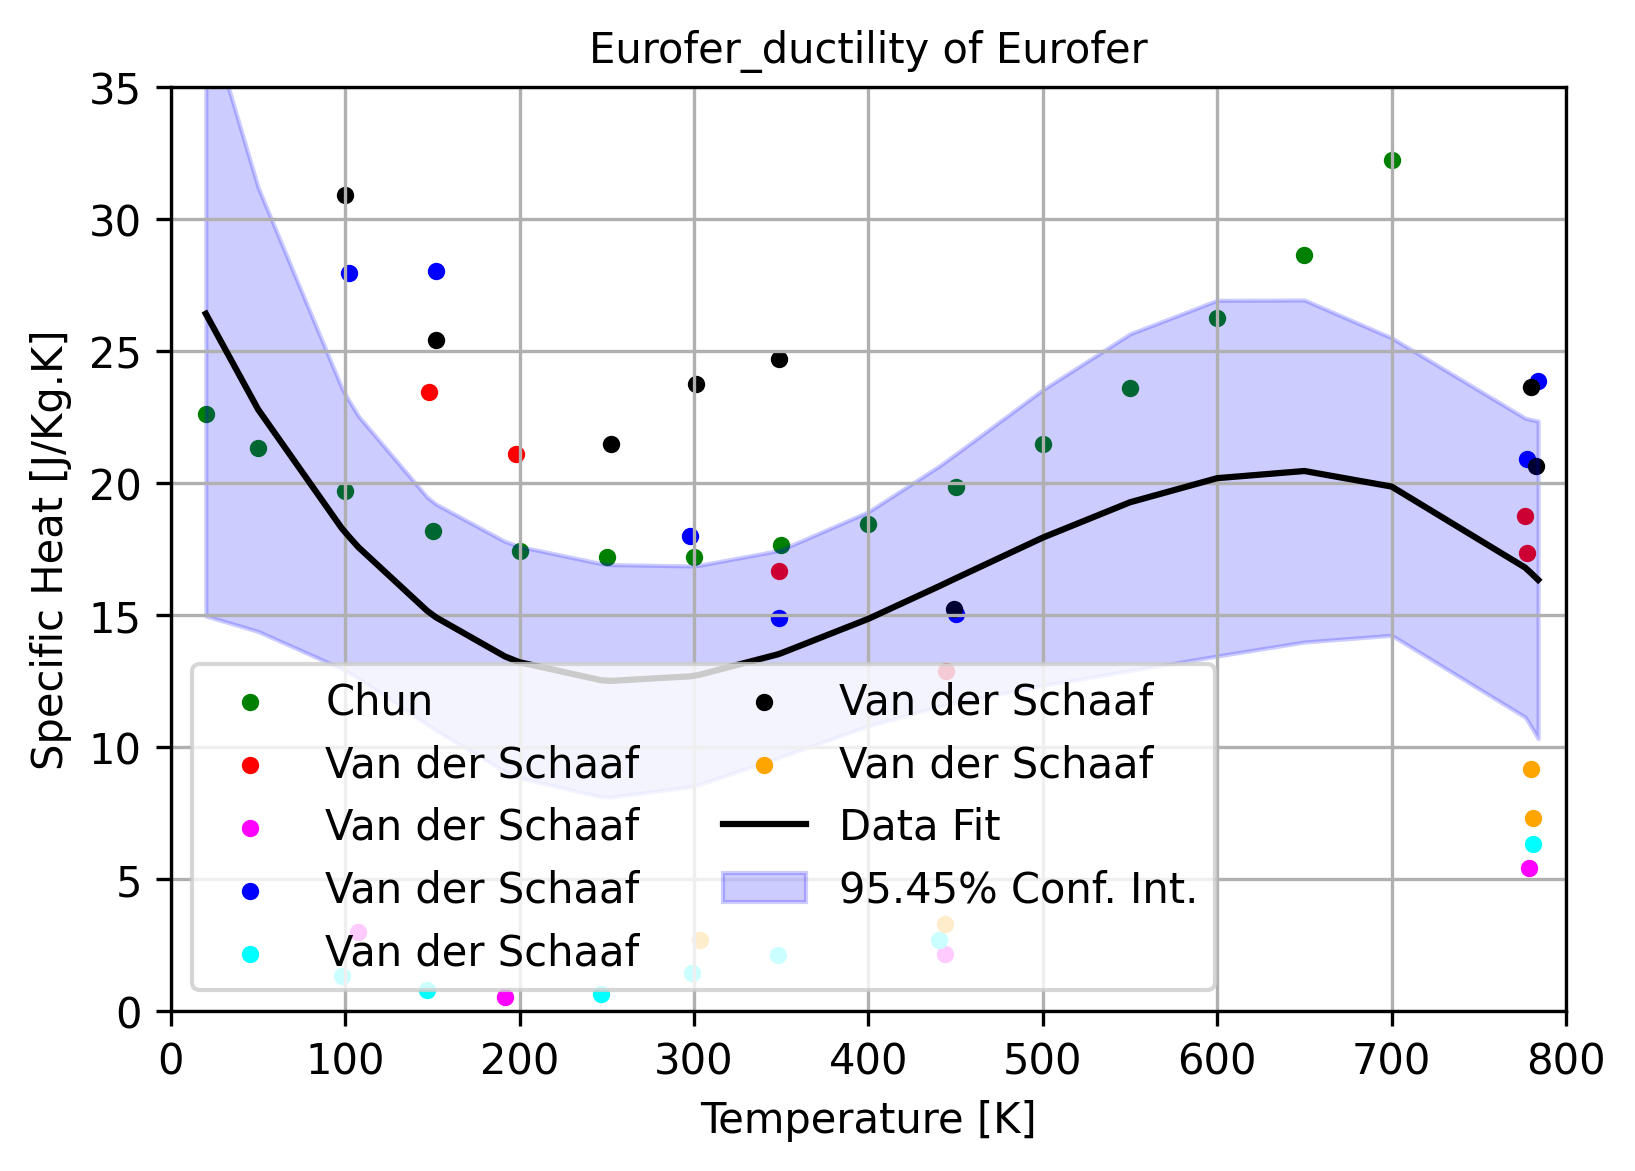

In [106]:
# Temperature range and initializations
T = np.arange(0, 800, 10)
n = len(T)

# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]

T, k = concatenate_and_sort(vars_x, vars_y)

x_data_list = [x for x in vars_x]
y_data_list = vars_y
data_colors = ['green', 'red', 'magenta', 'blue', 'cyan', 'black', 'orange', 'purple', ]
data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['Chun', 'Van der Schaaf', 'Van der Schaaf', 'Van der Schaaf', 'Van der Schaaf', 'Van der Schaaf', 'Van der Schaaf']

fit_result = get_model_fit_and_print_it(T, k, fit_func='poly', fit_fun_args_and_initials={'a':1, 'b':1, 'c':1, 'd':1}, material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

custom_multi_plot(x_data_list, y_data_list,
                  x_label='Temperature [K]', y_label=r'Specific Heat [J/Kg.K]', title=material_property + " of " + material_name,
                  scale='linear', font_size=fsize, xlim=[0, 800], ylim=[0, 35], 
                  grid=True, legend=True, data_labels=data_labels, fit_labels=None,
                  data_colors=data_colors, fit_colors=None, data_marker_sizes=data_marker_sizes, 
                  fit_line_widths=[2], x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize, 
                  legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2)
# 
plot_fit_and_conf(T, fit_result, sigma=2, legend=True, legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2,
                  fit_line_color='red', pred_int_fill_color='grey', conf_int_fill_color='blue')

<a id=cp></a>
<h3>2.12. Toughness</h3m> 

In [107]:
material_property = "Eurofer_toughness"
var_names, variables = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=23, room_temp=293)

,EUROFER97SolidHIPJointTempC,EUROFER97SolidHIPJointEnergyJ/cm^2,EUROFER97SolidHIPBulkTempC1,EUROFER97SolidHIPBulkEnergyJ/cm^21,EUROFER97980C27+760C15hTempC2,EUROFER97980C27+760C15hEnergyJ,EUROFER971050C30+750C3hTempC3,EUROFER971050C30+750C3hEnergyJ1,EUROFER971075C30+750C2hTempC4,EUROFER971075C30+750C2hEnergyJ2
0,-195.475113,4.517469,-191.855204,5.754395,-100.747390,11.533552,-90.459887,31.932001,-60.366836,13.222786
1,-52.488688,65.876048,-53.393665,65.464357,-80.466448,74.661497,-80.540412,105.430361,-45.563973,155.231733
2,-22.624434,87.248720,-21.719457,102.824345,-60.708023,155.156576,-60.526096,179.475097,-50.393081,164.140769
3,-3.619910,178.681107,-3.619910,171.304058,-20.170593,191.586042,-40.412765,212.329257,-55.696988,170.566060
4,20.814480,208.649210,20.814480,200.862325,-30.303609,206.920370,-20.097226,261.065315,-40.372204,195.456010
5,200.904977,212.296936,202.714932,215.579334,-10.436624,242.254697,-20.051894,242.206979,-30.239189,180.121682
6,400.000000,208.606557,400.000000,215.163934,-20.300626,245.679690,-0.356099,248.756338,-30.278557,196.498658
7,NaN,NaN,NaN,NaN,22.743215,239.441694,23.152401,269.220400,-20.351924,267.019386
8,NaN,NaN,NaN,NaN,39.774530,254.414554,60.212944,252.034596,0.080525,267.120787
9,NaN,NaN,NaN,NaN,59.986877,246.078139,40.011333,255.904563,23.152401,269.220400


**Fitting parameters for Eurofer Eurofer_toughness** 


[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 11
    # data points      = 58
    # variables        = 4
    chi-square         = 167690.030
    reduced chi-square = 3105.37092
    Akaike info crit   = 470.226910
    Bayesian info crit = 478.468682
    R-squared          = 0.60500884
[[Variables]]
    a: -6.7590e-07 +/- 2.3569e-06 (348.70%) (init = 1)
    b: -0.00220289 +/- 7.4709e-04 (33.91%) (init = 1)
    c:  0.96759663 +/- 0.13732107 (14.19%) (init = 1)
    d:  203.810599 +/- 8.30343845 (4.07%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.8827
    C(a, c) = -0.6553
    C(b, d) = -0.3792
    C(b, c) = +0.3241
    C(a, d) = +0.2021


**The equation for Eurofer Eurofer_toughness is:**


-6.75902e-7*T**3 - 0.00220289*T**2 + 0.967597*T + 203.811

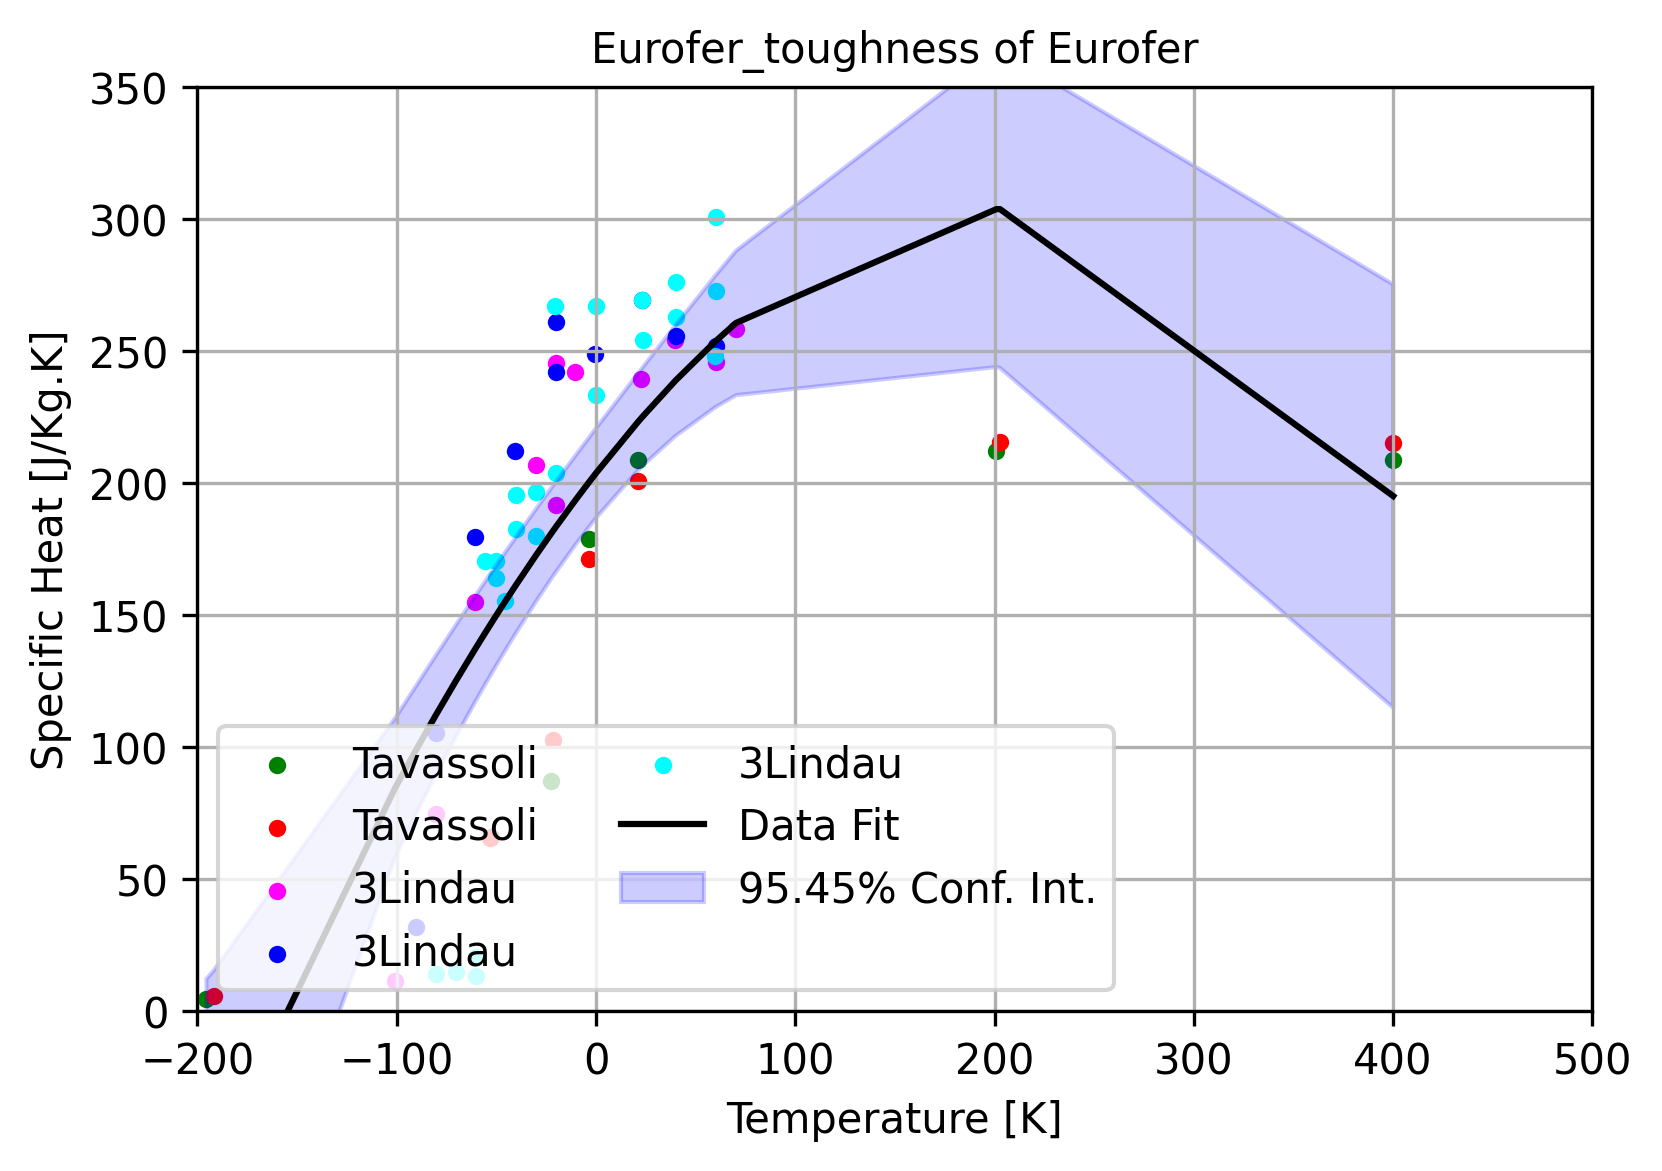

In [108]:
# Temperature range and initializations
T = np.arange(-200, 500, 10)
n = len(T)

# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]

T, k = concatenate_and_sort(vars_x, vars_y)

x_data_list = [x for x in vars_x]
y_data_list = vars_y
data_colors = ['green', 'red', 'magenta', 'blue', 'cyan', 'black', 'orange', 'purple', ]
data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['Tavassoli', 'Tavassoli', '3Lindau', '3Lindau', '3Lindau']

fit_result = get_model_fit_and_print_it(T, k, fit_func='poly', fit_fun_args_and_initials={'a':1, 'b':1, 'c':1, 'd':1}, material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

custom_multi_plot(x_data_list, y_data_list,
                  x_label='Temperature [K]', y_label=r'Specific Heat [J/Kg.K]', title=material_property + " of " + material_name,
                  scale='linear', font_size=fsize, xlim=[-200, 500], ylim=[0, 350], 
                  grid=True, legend=True, data_labels=data_labels, fit_labels=None,
                  data_colors=data_colors, fit_colors=None, data_marker_sizes=data_marker_sizes, 
                  fit_line_widths=[2], x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize, 
                  legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2)
# 
plot_fit_and_conf(T, fit_result, sigma=2, legend=True, legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2,
                  fit_line_color='red', pred_int_fill_color='grey', conf_int_fill_color='blue')

<a id=cp></a>
<h3>2.13. Creep</h3m> 

In [110]:
material_property = "Eurofer_creep"
var_names, variables = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=10, room_temp=293)

,EUROFER97600CTimeh,EUROFER97600CStressIntensityStMPa,EUROFER97550CTimeh1,EUROFER97550CStressIntensityStMPa1,EUROFER97500CTimeh2,EUROFER97500CStressIntensityStMPa2,EUROFER97450CTimeh3,EUROFER97450CStressIntensityStMPa3,EUROFER97650CTimeh4,EUROFER97650CStressIntensityStMPa4
0,10,123.97806,10,161.47684,10,205.79383,10,250.68169,10,95.557892
1,30,113.80448,30,151.87212,30,195.62227,30,239.94060,30,88.682804
2,100,103.06742,100,140.56755,100,183.74884,100,229.77239,100,81.200483
3,300,92.89384,300,130.96282,300,174.14411,300,218.46245,300,74.529006
4,1000,82.72631,1000,120.22643,1000,163.97658,1000,208.29424,1000,66.640814
5,3000,73.12159,3000,111.18989,3000,154.94004,3000,200.39541,3000,60.172496
6,10000,64.09042,10000,101.02303,10000,143.06729,10000,189.09084,10000,52.487914
7,30000,55.05388,30000,91.98649,30000,134.59826,30000,179.48612,30000,45.612377
8,100000,44.88500,100000,81.81762,100000,125.56709,100000,168.74973,100000,37.927795
9,300000,36.98483,300000,72.21289,300000,115.39486,300000,159.71319,300000,30.849548


**Fitting parameters for Eurofer Eurofer_creep** 


[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 50
    # variables        = 4
    chi-square         = 142959.946
    reduced chi-square = 3107.82491
    Akaike info crit   = 405.914838
    Bayesian info crit = 413.562930
    R-squared          = 0.16810037
[[Variables]]
    a: -5.8793e-14 +/- 4.6966e-14 (79.88%) (init = 1)
    b:  2.5077e-08 +/- 1.8499e-08 (73.77%) (init = 1)
    c: -0.00243627 +/- 0.00138129 (56.70%) (init = 1)
    d:  144.336998 +/- 10.3778339 (7.19%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9975
    C(b, c) = -0.9765
    C(a, c) = +0.9594
    C(c, d) = -0.5036
    C(b, d) = +0.4236
    C(a, d) = -0.3998


**The equation for Eurofer Eurofer_creep is:**


-5.87931e-14*T**3 + 2.50774e-8*T**2 - 0.00243627*T + 144.337

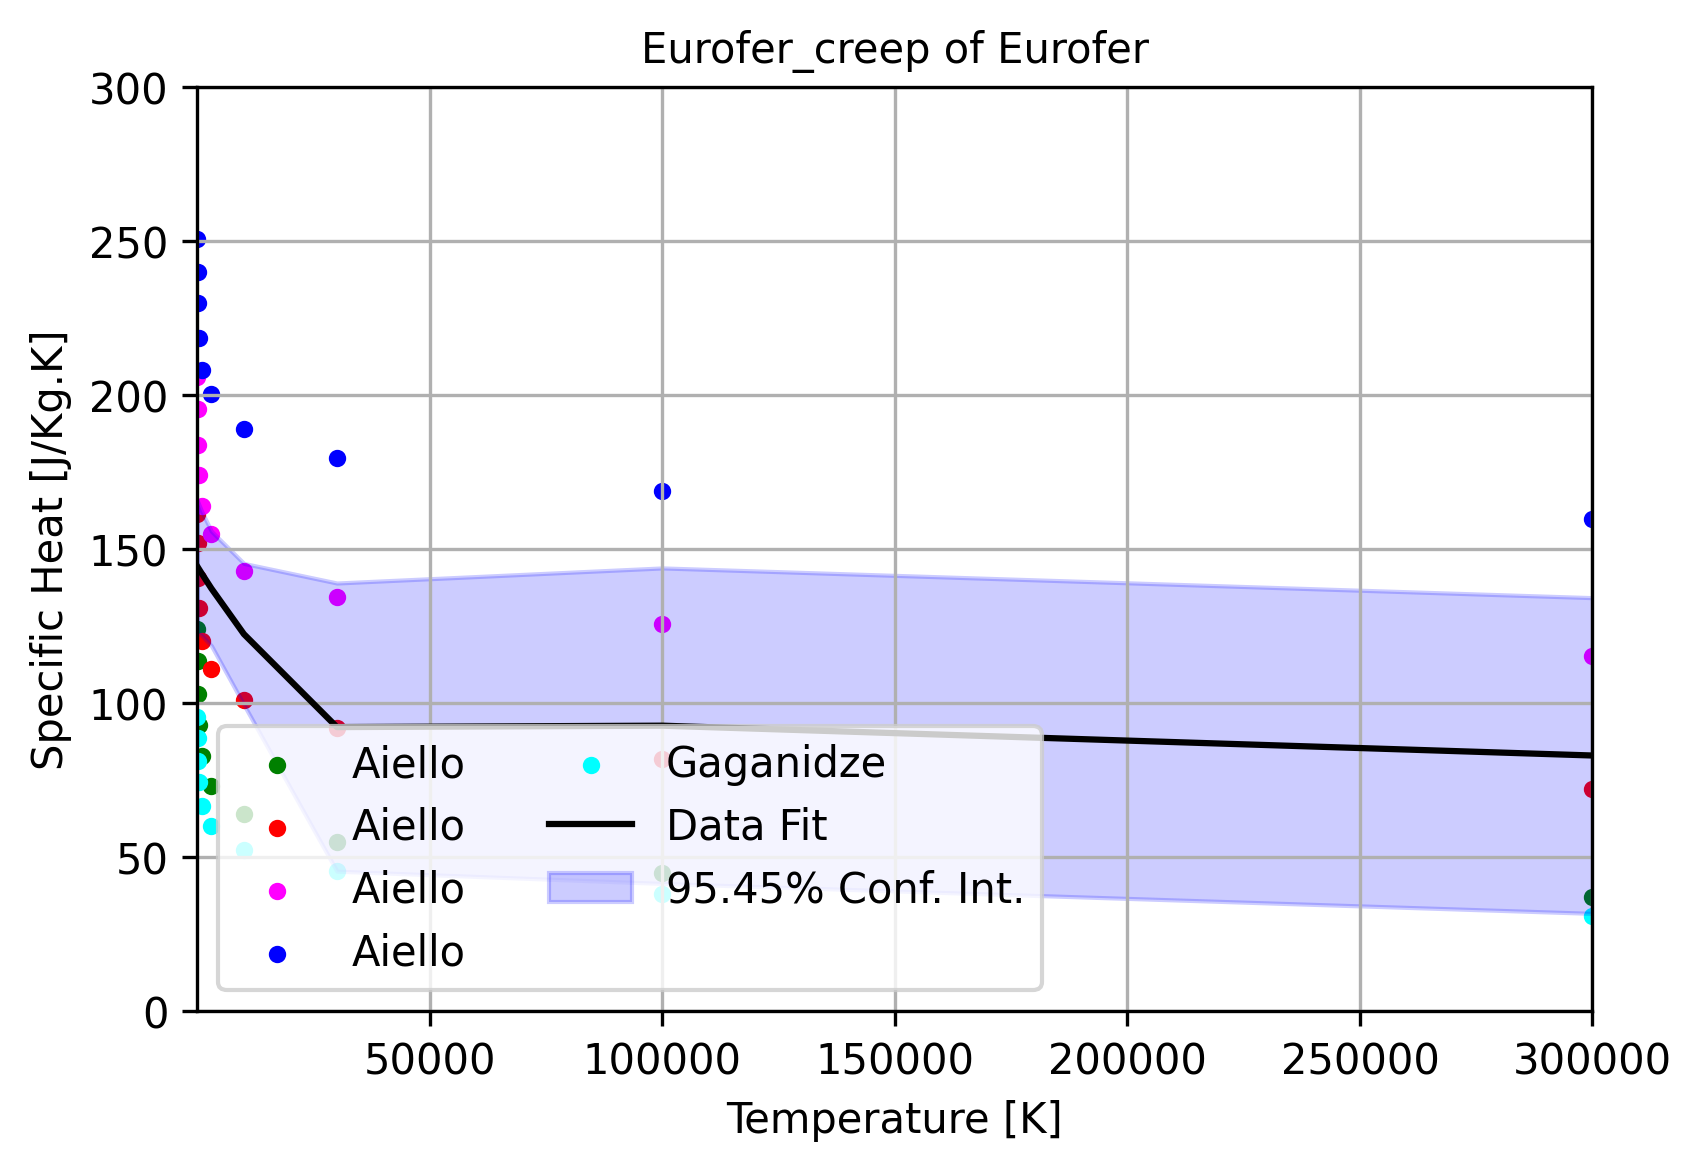

In [111]:
# Temperature range and initializations
T = np.arange(10, 300000, 10)
n = len(T)

# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]

T, k = concatenate_and_sort(vars_x, vars_y)

x_data_list = [x for x in vars_x]
y_data_list = vars_y
data_colors = ['green', 'red', 'magenta', 'blue', 'cyan', 'black', 'orange', 'purple', ]
data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['Aiello', 'Aiello', 'Aiello', 'Aiello', 'Gaganidze']

fit_result = get_model_fit_and_print_it(T, k, fit_func='poly', fit_fun_args_and_initials={'a':1, 'b':1, 'c':1, 'd':1}, material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

custom_multi_plot(x_data_list, y_data_list,
                  x_label='Temperature [K]', y_label=r'Specific Heat [J/Kg.K]', title=material_property + " of " + material_name,
                  scale='linear', font_size=fsize, xlim=[10, 300000], ylim=[0, 300], 
                  grid=True, legend=True, data_labels=data_labels, fit_labels=None,
                  data_colors=data_colors, fit_colors=None, data_marker_sizes=data_marker_sizes, 
                  fit_line_widths=[2], x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize, 
                  legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2)
# 
plot_fit_and_conf(T, fit_result, sigma=2, legend=True, legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2,
                  fit_line_color='red', pred_int_fill_color='grey', conf_int_fill_color='blue')

<a id=cp></a>
<h3>2.14. Fatigue</h3m> 

In [112]:
material_property = "Eurofer_fatigue"
var_names, variables = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=31, room_temp=293)

,EUROFER97DesignNumberofcyclestofailure,EUROFER97DesignTotalStrainRangeΔε%,EUROFER97AverageNumberofcyclestofailure1,EUROFER97AverageTotalStrainRangeΔε%1,EUROFER97RoomTempNumberofcyclestofailure2,EUROFER97RoomTempTotalStrainRangeΔε%2,EUROFER97500CNumberofcyclestofailure3,EUROFER97500CTotalStrainRangeΔε%3,EUROFER97550CNumberofcyclestofailure4,EUROFER97550CTotalStrainRangeΔε%4,EUROFER97SSTTSpecimensNumberofcyclestofailure5,EUROFER97SSTTSpecimensTotalStrainRangeΔε%5,EUROFER97LargeSpecimensNumberofcyclestofailure6,EUROFER97LargeSpecimensTotalStrainRangeΔε%6
0,4.86382,4.99230,1.002755e+02,4.96676,649.06276,1.80845,389.44281,1.80583,392.51536,1.49883,583.883941,1.194853,748.806745,1.812500
1,9.94513,3.33627,1.967464e+02,3.31912,1056.55178,1.40437,554.66058,1.80058,563.44722,1.49621,612.061015,1.198529,1306.069797,1.610294
2,24.99479,1.98115,4.944766e+02,1.99858,1161.03795,1.40437,680.40031,1.40175,1073.28911,1.00292,781.370738,1.194853,1740.589176,1.500000
3,48.37131,1.38035,1.011065e+03,1.38289,4891.24926,1.00554,759.53200,1.40175,895.81521,1.00292,811.304105,1.194853,1609.172644,1.411765
4,100.27548,0.97527,1.983769e+03,0.98385,5208.63050,1.00292,1098.89357,1.00292,2044.46747,0.70117,636.739196,1.000000,1719.072202,1.419118
5,252.01924,0.67491,4.917635e+03,0.67144,4381.65546,0.80087,1326.98769,0.99767,3434.28377,0.69854,768.412176,1.000000,1801.782153,1.419118
6,494.47662,0.52928,9.917810e+03,0.53394,5127.40486,0.80087,1615.06917,0.80087,16535.98365,0.39942,944.909371,1.000000,2016.330988,1.411765
7,50270.61721,0.18695,2.027911e+04,0.45203,19198.90460,0.59883,2143.17690,0.80087,20125.85161,0.40204,1229.350919,1.000000,2410.198552,1.408088
8,98633.91790,0.16849,5.096687e+04,0.37224,27559.60810,0.60146,5007.93523,0.60408,NaN,NaN,1312.947314,1.000000,2730.200097,1.224265
9,207303.64080,0.15944,9.863392e+04,0.34256,145821.82377,0.39942,5374.96235,0.60408,NaN,NaN,1157.778419,0.904412,2536.656753,1.018382


**Fitting parameters for Eurofer Eurofer_fatigue** 


[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 111
    # variables        = 4
    chi-square         = 53.6064447
    reduced chi-square = 0.50099481
    Akaike info crit   = -72.7925603
    Bayesian info crit = -61.9544395
    R-squared          = 0.16152050
[[Variables]]
    a: -2.0895e-17 +/- 8.5121e-18 (40.74%) (init = 1)
    b:  3.2684e-11 +/- 1.1636e-11 (35.60%) (init = 1)
    c: -1.2690e-05 +/- 3.4491e-06 (27.18%) (init = 1)
    d:  1.15049558 +/- 0.07603661 (6.61%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9889
    C(b, c) = -0.9435
    C(a, c) = +0.8877
    C(c, d) = -0.4182
    C(b, d) = +0.3411
    C(a, d) = -0.3054


**The equation for Eurofer Eurofer_fatigue is:**


-2.08948e-17*T**3 + 3.26836e-11*T**2 - 1.26899e-5*T + 1.1505

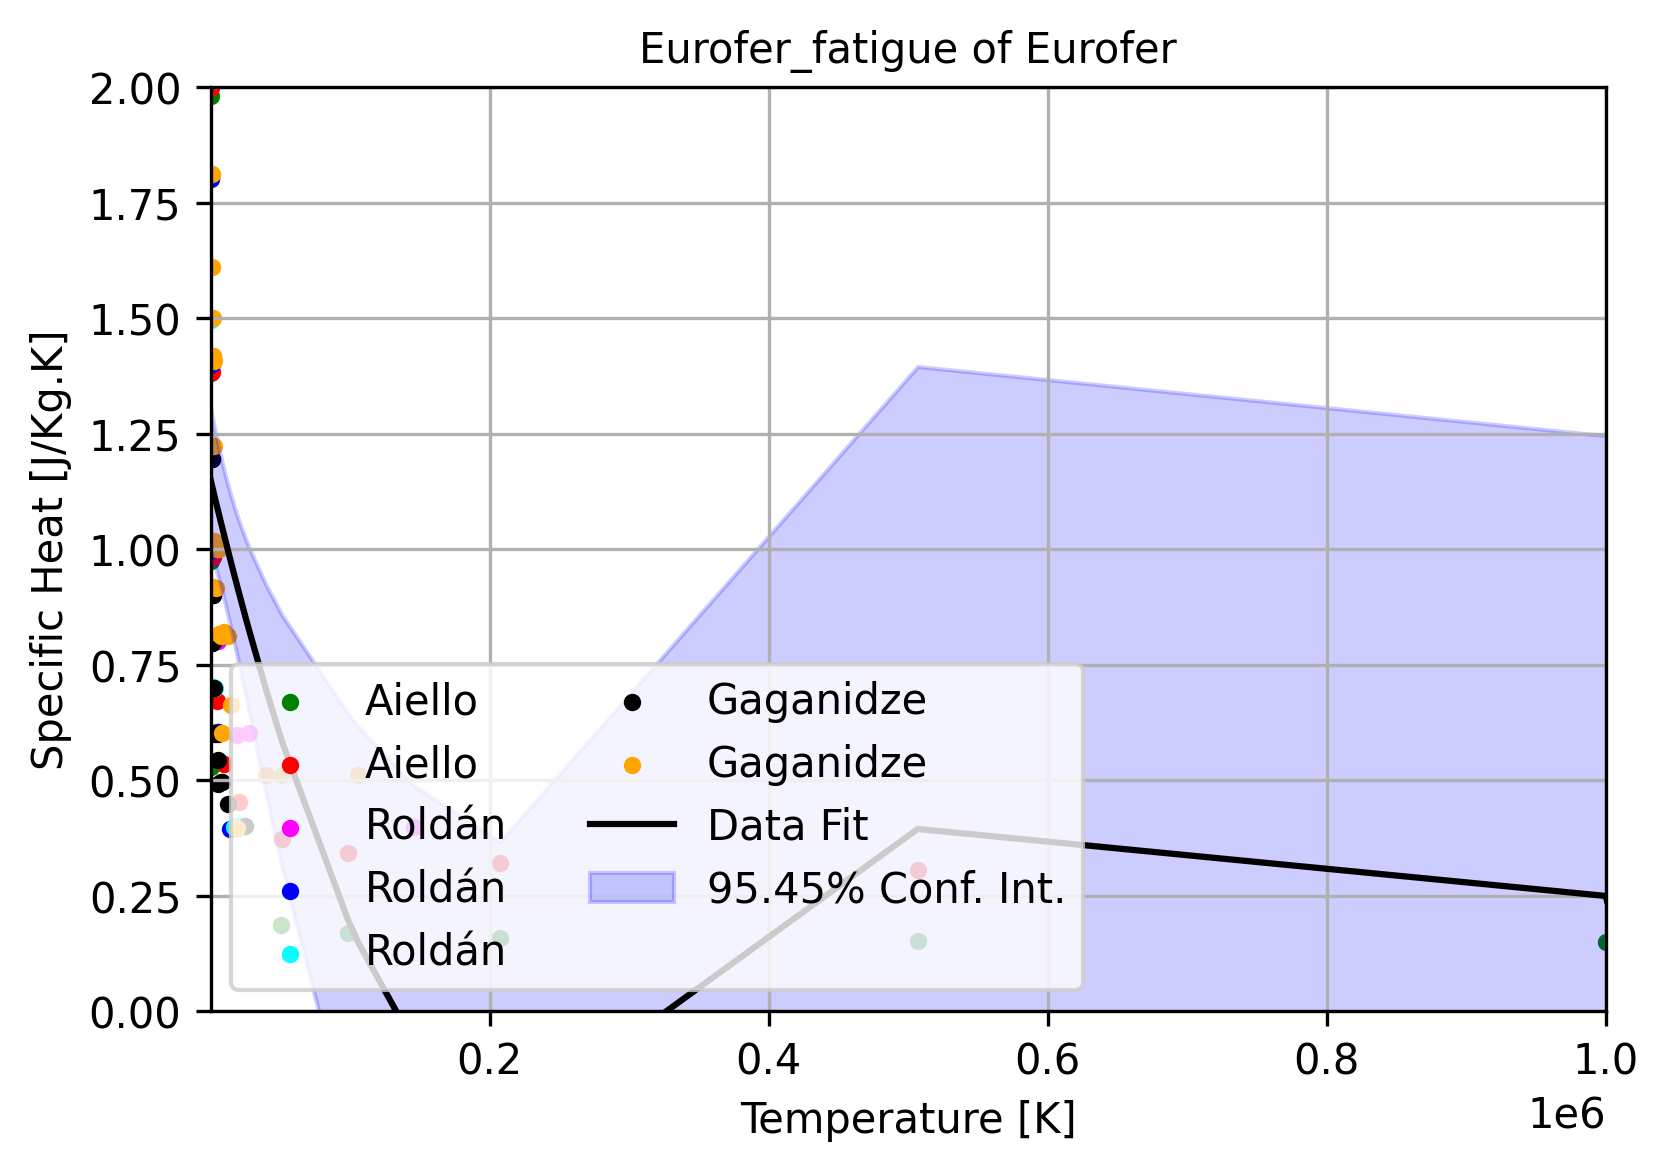

In [113]:
# Temperature range and initializations
T = np.arange(10, 1000000, 10)
n = len(T)

# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]

T, k = concatenate_and_sort(vars_x, vars_y)

x_data_list = [x for x in vars_x]
y_data_list = vars_y
data_colors = ['green', 'red', 'magenta', 'blue', 'cyan', 'black', 'orange', 'purple', ]
data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['Aiello', 'Aiello', 'Roldán', 'Roldán', 'Roldán', 'Gaganidze', 'Gaganidze']

fit_result = get_model_fit_and_print_it(T, k, fit_func='poly', fit_fun_args_and_initials={'a':1, 'b':1, 'c':1, 'd':1}, material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

custom_multi_plot(x_data_list, y_data_list,
                  x_label='Temperature [K]', y_label=r'Specific Heat [J/Kg.K]', title=material_property + " of " + material_name,
                  scale='linear', font_size=fsize, xlim=[10, 1000000], ylim=[0, 2], 
                  grid=True, legend=True, data_labels=data_labels, fit_labels=None,
                  data_colors=data_colors, fit_colors=None, data_marker_sizes=data_marker_sizes, 
                  fit_line_widths=[2], x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize, 
                  legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2)
# 
plot_fit_and_conf(T, fit_result, sigma=2, legend=True, legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2,
                  fit_line_color='red', pred_int_fill_color='grey', conf_int_fill_color='blue')